In [1]:
__imp

Libraries have been loaded


In [2]:
# load additional libraries
basepath = os.path.expanduser('~/Desktop/src/ml/ao_to_ai/')

pd.set_option('max_columns', None)

## Load Dataset

In [3]:
%%time

# men ( data )
men_train = pd.read_csv(os.path.join(basepath, 'data/raw/mens_train_file.csv'))
men_test  = pd.read_csv(os.path.join(basepath, 'data/raw/mens_test_file.csv'))

# women ( data )
women_train = pd.read_csv(os.path.join(basepath, 'data/raw/womens_train_file.csv'))
women_test  = pd.read_csv(os.path.join(basepath, 'data/raw/womens_test_file.csv'))

# submission
sub = pd.read_csv(os.path.join(basepath, 'data/raw/AUS_SubmissionFormat.csv'))

CPU times: user 68 ms, sys: 8 ms, total: 76 ms
Wall time: 783 ms


In [4]:
# head of men's train dataframe
men_train.head()

rally  serve hitpoint      speed  net.clearance  distance.from.sideline  \
0      4      1        B  35.515042      -0.021725                3.474766   
1      4      2        B  33.382640       1.114202                2.540801   
2     23      1        B  22.316690      -0.254046                3.533166   
3      9      1        F  36.837309       0.766694                0.586885   
4      4      1        B  35.544208       0.116162                0.918725   

      depth  outside.sideline  outside.baseline  player.distance.travelled  \
0  6.797621             False             False                   1.467570   
1  2.608708             False              True                   2.311931   
2  9.435749             False             False                   3.903728   
3  3.342180              True             False                   0.583745   
4  5.499119             False             False                   2.333456   

   player.impact.depth  player.impact.distance.from.center  player.depth  \
0              14.1758                              1.1448       13.6704   
1              12.7396                              4.6258       12.6358   
2              15.3782                              1.4336       13.6996   
3              13.7308                              0.0312       13.1492   
4              15.1992                              1.7596       14.1310   

   player.distance.from.center  previous.speed  previous.net.clearance  \
0                       0.2330       32.313592                1.350533   
1                       2.3162       34.060788                0.760499   
2                       2.0908       39.806628                0.377732   
3                       0.0188       25.018818                1.239033   
4                       0.3150       36.790979                0.165731   

   previous.distance.from.sideline  previous.depth  opponent.depth  \
0                         2.449182        0.705435         12.5628   
1                         0.583291        3.856600         12.3544   
2                         1.115250        2.908892         13.8620   
3                         3.256695        0.557554         14.2596   
4                         1.431146        3.945317         11.3658   

   opponent.distance.from.center  same.side previous.hitpoint  \
0                         2.0724       True                 F   
1                         5.1124      False                 B   
2                         1.6564      False                 F   
3                         0.1606       True                 B   
4                         1.1082      False                 F   

   previous.time.to.net  server.is.impact.player    id  train outcome gender  
0              0.445318                    False  5718      1      UE   mens  
1              0.432434                    False   371      1      FE   mens  
2              0.397538                     True  7948      1      FE   mens  
3              0.671984                     True  9312      1      UE   mens  
4              0.340411                    False  7667      1       W   mens

In [5]:
# head of men's test dataframe
men_test.head()

rally  serve hitpoint      speed  net.clearance  distance.from.sideline  \
0      8      1        F  28.137918       0.468679                1.966179   
1      5      1        F  38.966954      -0.019078                1.897606   
2     20      1        F  41.355933       0.311212                0.596189   
3     10      2        F  34.890887       0.400757                0.371935   
4      3      1        F  29.141742       1.620074                4.086164   

      depth  outside.sideline  outside.baseline  player.distance.travelled  \
0  3.314536              True             False                   2.681196   
1  7.236670             False             False                   2.615940   
2  2.599312              True             False                   0.540255   
3  3.156086              True             False                   0.883450   
4  0.523797             False              True                   1.527865   

   player.impact.depth  player.impact.distance.from.center  player.depth  \
0               9.7524                              1.8360       11.7466   
1              10.9856                              1.2494       13.0578   
2              13.4296                              0.1386       13.4462   
3              12.7154                              1.4566       13.4910   
4              11.2098                              2.1880       11.2612   

   player.distance.from.center  previous.speed  previous.net.clearance  \
0                       0.0438       29.633220                1.174355   
1                       0.3472       25.249938                2.043395   
2                       0.6786       32.749002                0.456805   
3                       1.8796       36.088930                0.560687   
4                       0.6610       34.483658                0.332496   

   previous.distance.from.sideline  previous.depth  opponent.depth  \
0                         1.502747        3.463435         14.4494   
1                         3.241975        5.041623         16.7640   
2                         4.071144        5.199691         13.1730   
3                         3.026854        4.173466         13.9632   
4                         2.600082        5.034880         12.2838   

   opponent.distance.from.center  same.side previous.hitpoint  \
0                         3.6362      False                 F   
1                         3.8780      False                 F   
2                         1.1952       True                 F   
3                         4.1212      False                 F   
4                         4.6912      False                 F   

   previous.time.to.net  server.is.impact.player    id  train  outcome gender  
0              0.618826                    False  3818      0      NaN   mens  
1              0.859699                     True  4314      0      NaN   mens  
2              0.472725                    False  8954      0      NaN   mens  
3              0.468570                    False  4883      0      NaN   mens  
4              0.416195                     True  6126      0      NaN   mens

In [11]:
print('Number of training examples in mens train set ', len(men_train))
print('Number of test examples in mens test set ', len(men_test))

Number of training examples in mens train set  5000
Number of test examples in mens test set  2000


In [13]:
print('Number of training examples in women train set ', len(women_train))
print('Number of test examples in women test set ', len(women_test))

Number of training examples in women train set  5000
Number of test examples in women test set  1000


In [12]:
print('Number of features in the dataset ', men_train.shape[1])

Number of features in the dataset  28


In [15]:
print('Class balance (men):\n\n', men_train.outcome.value_counts())

Class balance (men):

 UE    2118
W     1684
FE    1198
Name: outcome, dtype: int64


In [16]:
print('Class balance (women):\n\n', women_train.outcome.value_counts())

Class balance (women):

 UE    2258
W     1668
FE    1074
Name: outcome, dtype: int64


In [6]:
%%time

# merge men and women data
train = pd.concat((men_train, women_train)).sample(frac=1.)
test  = pd.concat((men_test, women_test)).sample(frac=1.)

CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 421 ms


### Thoughts

- How would we distinguish between singles and doubles games ?
- We have a logical variable that says whether ball was out of inplay sidelines and lateral distance between ball bounce and sidelines to capture positive and negative distance from sidelines where positive would indicate that ball on the inside or outside of the sidelines.

### Is data intuitive ?

** Domain Knowledge **

HYPOTHESIS 1:

If net clearance is less than zero, meaning shot hit the net that means it can't be a winner hence it should fall either under Unforced or Forced error.

In [25]:
pd.crosstab(train['net.clearance'] < 0, train['outcome'])

outcome          FE    UE     W
net.clearance                  
False          1279  2665  3291
True            993  1711    61

** As suspected there are very few ending shots that are marked as winners if net clearance is negative. But why are these 61 entries, we could look at them in detail later. **

I think it would be easier to differentiate between a winner and errors, but difficult to differentiate winners from unforced errors and unforced errors from forced errors.

HYPOTHESIS 2:

Most of the times on second serve your opponent ends up hitting a winner.

In [27]:
pd.crosstab(train['serve'], train['outcome'])

outcome    FE    UE     W
serve                    
1        1371  2446  2212
2         901  1930  1140

** There are high percentages of shots that end up as forced errors or winners on a second serve. **

HYPOTHESIS 3:

If lateral distance of point-ending shot bounce from the nearest singles sideline is very low and opponent wins the point then it is a forced error.

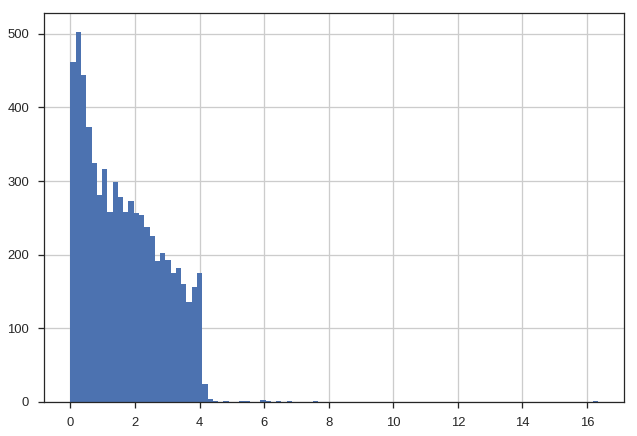

In [35]:
mask = train['outcome'] != 'W' 

# 1. first look at the distribution of the lateral distance from sidelines

train.loc[mask, 'distance.from.sideline'].hist(bins=100);

Lateral distance between single's sideline and double's sideline is 4 ft 6 in that is why most of the values are in that range.

HYPOTHESIS 4: 

If distance of ball bounce from baseline is low it is very unlikely that you would hit a winner.

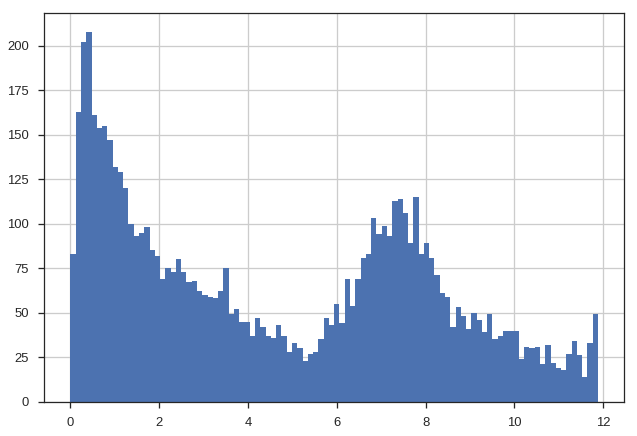

In [38]:
# look at distribution of distance of ball bounce from baseline

train.loc[mask, 'depth'].hist(bins=100);

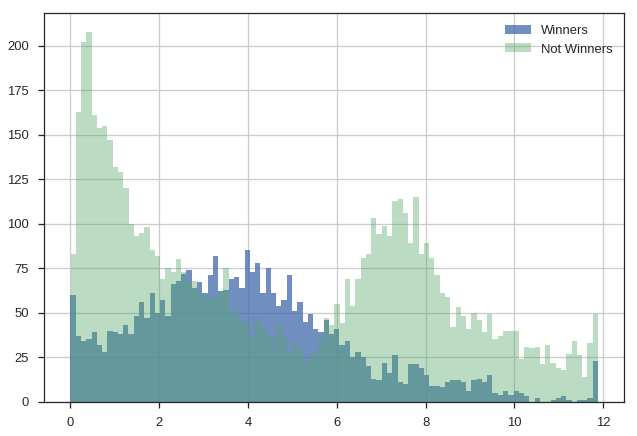

In [43]:
# if we color them by outcome

train.loc[train['outcome'] == 'W', 'depth'].hist(alpha=.8, bins=100, label='Winners')
train.loc[train['outcome'] != 'W', 'depth'].hist(alpha=.4, bins=100, label='Not Winners')
plt.legend(loc='best');

If a logical variable indicates that point-ending shot landed outside of inplay singles sideline,  what does that tell us about the outcome ?

In [44]:
pd.crosstab(train['outside.sideline'], train['outcome'])

outcome             FE    UE     W
outside.sideline                  
False             1638  3146  3343
True               634  1230     9

It says if ball didn't end up outside the singles sideline then point outcome is most-likely an unforced error or winner on opponent's part, but if it is true then it very likely that it it is an unforced or forced error, which makes sense.

Similarly a logical variable representing whether ball fell outside of baseline should give some information about nature of outcome.

In [50]:
pd.crosstab(train['outside.baseline'], train['outcome'])

outcome             FE    UE     W
outside.baseline                  
False             1680  2979  3328
True               592  1397    24

It says pretty much along the same lines that if ball bounced beyond baseline then it can't be a winner but if it didn't then it is more likely that it was an unforced error or a winner.

Follow up questions:

- How is it possible that point ending shot was inside baseline and it was a forced or an unforced error by the opponent.
    - Only reason I can think of is that ball was outside sidelines but still inside baseline.

HYPOTHESIS 6:

Let's see if the above argument holds up aginst our data.

In [51]:
pd.crosstab('base_' + train['outside.baseline'].astype('str') +\
            '_side_' + train['outside.sideline'].astype('str'), train['outcome'])

outcome                  FE    UE     W
row_0                                  
base_False_side_False  1136  1926  3321
base_False_side_True    544  1053     7
base_True_side_False    502  1220    22
base_True_side_True      90   177     2

Let's cut through it one by one

- If ball fell inside baseline but outside baseline then it can't be a winner.
- If ball fell outside baseline but inside baseline then also it can't be a winner.
- If ball fell outside baseline and sideline then also it can't be a winner.

Special case.
- If ball is inside baseline and sidelines, so more often or not it is marked as winner but there are plenty of cases where this is marked as error as well.
    - The argument one can put in favor of this is that ball would have definitely not crossed the net.

HYPOTHESIS 7:

If ball is inside sidelines and baseline and still deemed as error then it is likely that it would have not crossed the net.

In [55]:
mask = (train['outside.baseline'] == False) & (train['outside.sideline'] == False) & (train['outcome'] != 'W')

(train.loc[mask, 'net.clearance'] < 0).value_counts()

True     2551
False     511
Name: net.clearance, dtype: int64

This makes sense as in this case the shot hit struck the net but still fell within valid playing field.

** So I was wondering whether all of this information is sufficient to solve this problem and one thought that came to my mind that the point ending shot alone should not be able to define the outcome but point is defined as series of shots and players try to out-maneuver their opponents, so we would ideally require some history of shots to estimate the final outcome more accurately. Luckily organisers have provided information about the penultimate shot which would definitely help us predict outcome better. **

Features :

- Distance player who made the point-ending shot travelled between impact of penultimate shot and the impact of point-ending shot. ( Euclidean distance )

HYPOTHESIS 8:

I think tennis being a game where balance is very important if player had moved not so far from previous shot to point-ending shot it would be highly likely that it would being a winner.

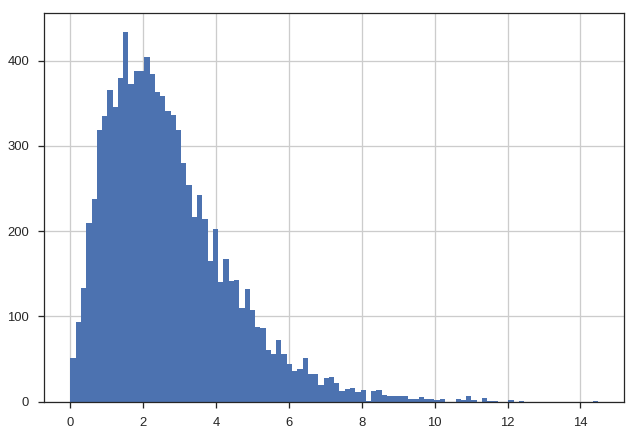

In [58]:
train['player.distance.travelled'].hist(bins=100);

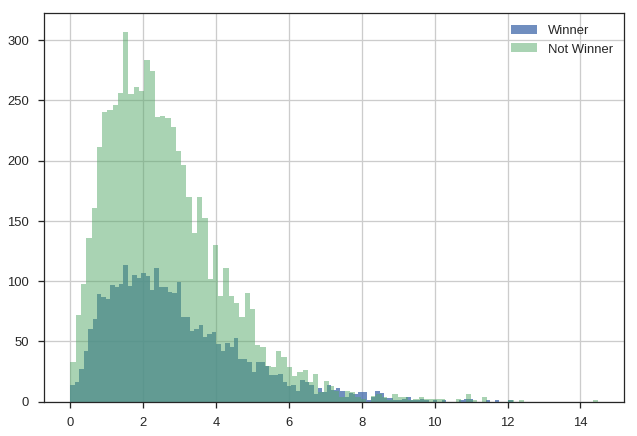

In [60]:
# let's color them by output
train.loc[(train['outcome'] == 'W'), 'player.distance.travelled'].hist(bins=100, alpha=.8, label='Winner')
train.loc[(train['outcome'] != 'W'), 'player.distance.travelled'].hist(bins=100, alpha=.5, label='Not Winner')
plt.legend();

It is clear that when distance is less than there are more winners, but it is still not clear enough.

- What if we look at the perpendicular distance of the player from the net.
    - So in tennis if we you come closer to net then gameplay is completely different you are more likely to hit the net but you are also more likely to catch your opponent off-gaurd and hit winners.
    
Note: If perpendicular is high it means that the player hit the point-ending shot from baseline, otherwise he had moved closer to the net to make the shot.

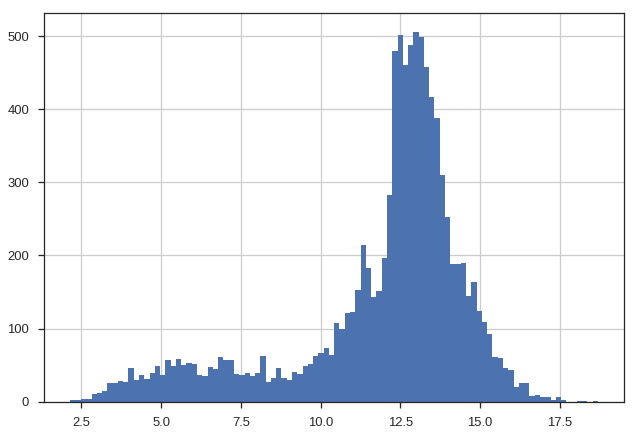

In [63]:
# let's look at the distribution
train['player.impact.depth'].hist(bins=100);

Most of the shots were played from baseline.

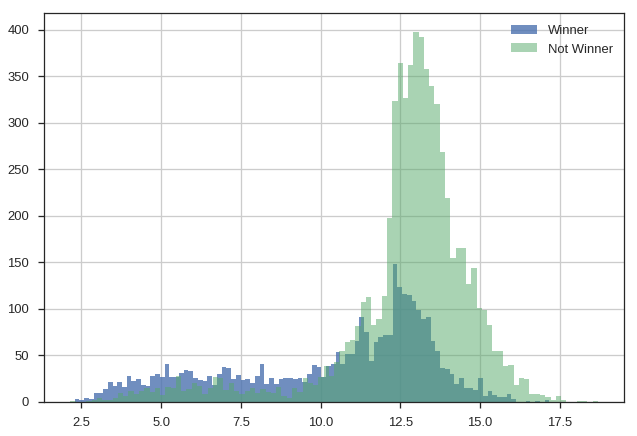

In [65]:
# let's look at how ratio of winners to errors is related to distance from net

train.loc[(train['outcome'] == 'W'), 'player.impact.depth'].hist(label='Winner', alpha=.8, bins=100)
train.loc[(train['outcome'] != 'W'), 'player.impact.depth'].hist(label='Not Winner', alpha=.5, bins=100)
plt.legend(loc='best');

For shots that were made closer from net the ratio of winners to errors were almost close to being equal.

Let' look at one scenario where both players are closer to net then more often or not the player that has to make a shot lobs the ball above the opponent to secure a winner but it could end up outside baseline or sidelines.

Note: This is a very rare occurence but still one that should generate your interest

In [66]:
pd.crosstab(train['same.side'], train['outcome'])

outcome      FE    UE     W
same.side                  
False      1639  3459  2438
True        633   917   914

One thing that has come out after looking at feature importance plot of xgboost is that

1. net.clearance is good feature
    - The logic behind this is that net.clearance can easily separate out winners from non-winners.
    
2. speed also turns out to be a good feature
    - Mind you this variable represents speed of point-ending shot ( m / s ), now what I think of this variable is that if speed is high and your opponent ends up missing the return shot then it is declared as winner otherwise if opponent tries to hit it and then misses it then it is declared as forced error.

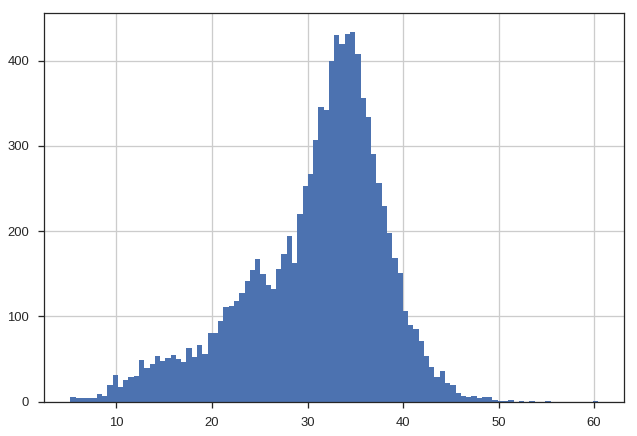

In [7]:
# let's look at speed
train.loc[:, 'speed'].hist(bins=100);

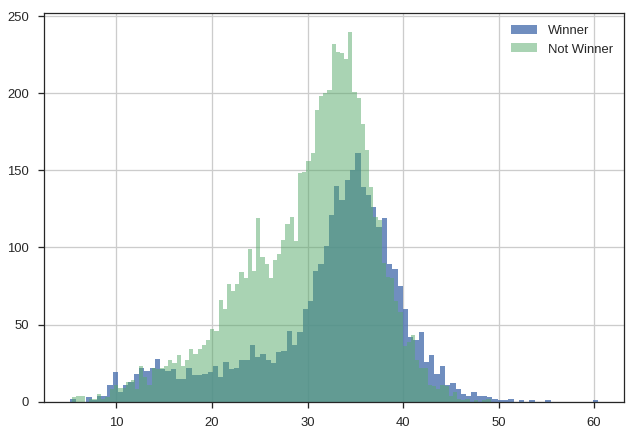

In [11]:
# encode it with target variable ( winner or no winner )
train.loc[(train.outcome == 'W'), 'speed'].hist(label='Winner', alpha=.8, bins=100)
train.loc[(train.outcome != 'W'), 'speed'].hist(label='Not Winner', alpha=.5, bins=100)

plt.legend(loc='best');

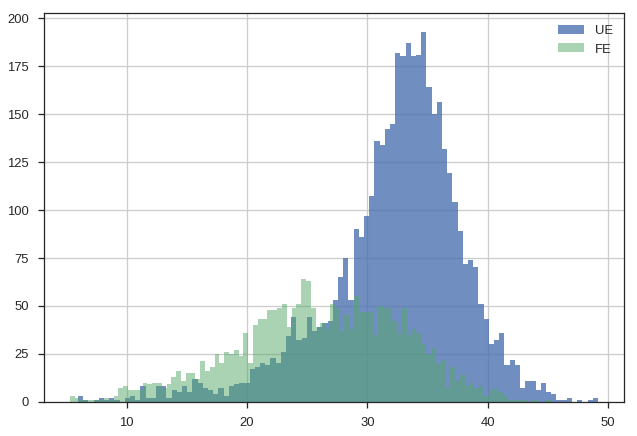

In [12]:
# encode it with target variable ( unforced or forced error )
train.loc[(train.outcome == 'UE'), 'speed'].hist(label='UE', alpha=.8, bins=100)
train.loc[(train.outcome == 'FE'), 'speed'].hist(label='FE', alpha=.5, bins=100)

plt.legend(loc='best');

I think just by looking at the point-ending shot you can't conclude that outcome was either unforced error or forced error.

After bit of Googling, I found out that:

- carefully angeled shots, drop shots, or a sudden change in pace lead to forced errors.

I will first tackle issue of sudden change in shot speed.

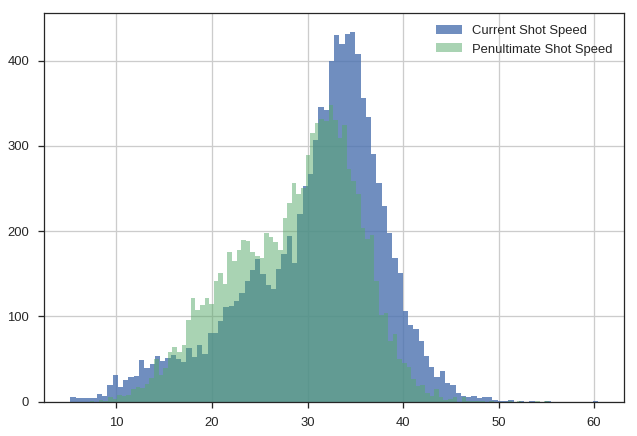

In [14]:
# let's look at the distribution of previous shot speed and point-ending shot speed
train.loc[:, 'speed'].hist(bins=100, alpha=.8, label='Current Shot Speed')
train.loc[:, 'previous.speed'].hist(bins=100, alpha=.5, label='Penultimate Shot Speed')

plt.legend(loc='best');

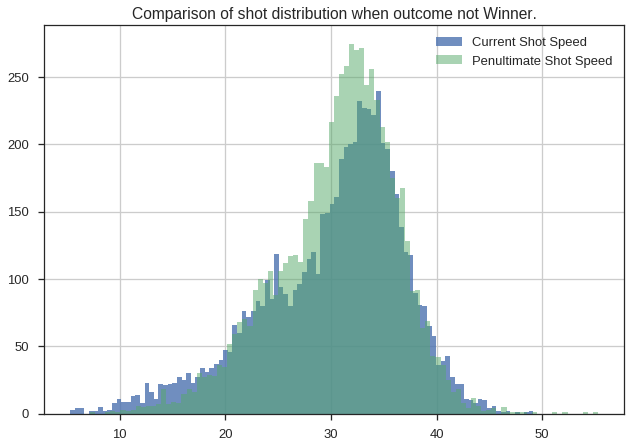

In [17]:
# let's look at the distribution of previous shot speed and point-ending shot speed
# when outcome is not winner.

mask = (train.outcome != 'W')

train.loc[mask, 'speed'].hist(bins=100, alpha=.8, label='Current Shot Speed')
train.loc[mask, 'previous.speed'].hist(bins=100, alpha=.5, label='Penultimate Shot Speed')

plt.legend(loc='best')
plt.title('Comparison of shot distribution when outcome not Winner.');

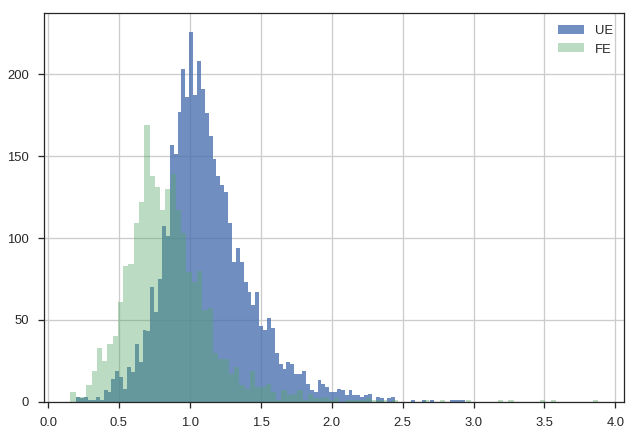

In [23]:
# let's take a ratio of shot speeds to see if that helps us differentiate between unforced and forced errors.

mask = (train.outcome != 'W')

ratio_speed = (train.loc[mask, 'speed'] / train.loc[mask, 'previous.speed'])

ratio_speed[(train.loc[mask].outcome == 'UE')].hist(bins=100, alpha=.8, label='UE')
ratio_speed[(train.loc[mask].outcome == 'FE')].hist(bins=100, alpha=.4, label='FE')
plt.legend(loc='best');

This looks like a very good feature.

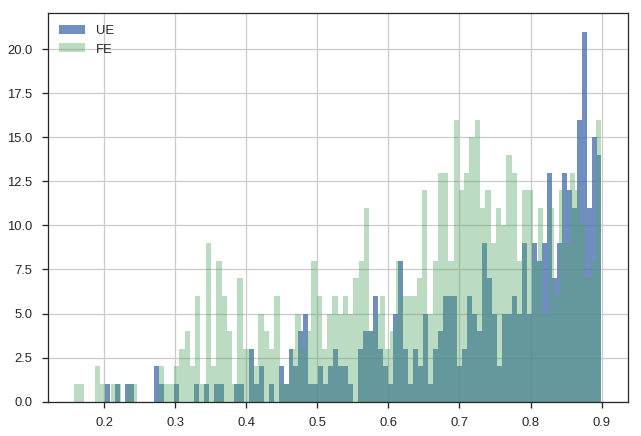

In [29]:
# how would we capture a drop shot that hit the net ? 
# ratio of speed less than 1 and ball hitting the net

ratio_speed = (train['speed'] / train['previous.speed'])

ratio_speed[(ratio_speed < .9) & (train['net.clearance'] < 0) & (train['outcome'] == 'UE')].hist(bins=100, label='UE', alpha=.8)
ratio_speed[(ratio_speed < .9) & (train['net.clearance'] < 0) & (train['outcome'] == 'FE')].hist(bins=100, label='FE', alpha=.4)

plt.legend(loc='best');

Indeed that is the case as when a player changes shot speed and opponent hits the net it is awarded as a forced error.

OBSERVATION 1:

1. There are no instances of aces or double faults recorded in the data, as minimum number of rally points recorded is 3.

In [33]:
train.loc[(train['rally'] == 2) & (train['serve'] == 2)]

Empty DataFrame
Columns: [rally, serve, hitpoint, speed, net.clearance, distance.from.sideline, depth, outside.sideline, outside.baseline, player.distance.travelled, player.impact.depth, player.impact.distance.from.center, player.depth, player.distance.from.center, previous.speed, previous.net.clearance, previous.distance.from.sideline, previous.depth, opponent.depth, opponent.distance.from.center, same.side, previous.hitpoint, previous.time.to.net, server.is.impact.player, id, train, outcome, gender]
Index: []

In [35]:
train.rally.min()

3

In [36]:
test.rally.min()

3

Let's try to encode a drop shot

1. When the depth of the ball bounce increases as in the perpendicular distance of ball bounce from baseline increases and ratio of ball speed decreases then most likely it is a drop shot and any error committed after that would count as forced error.

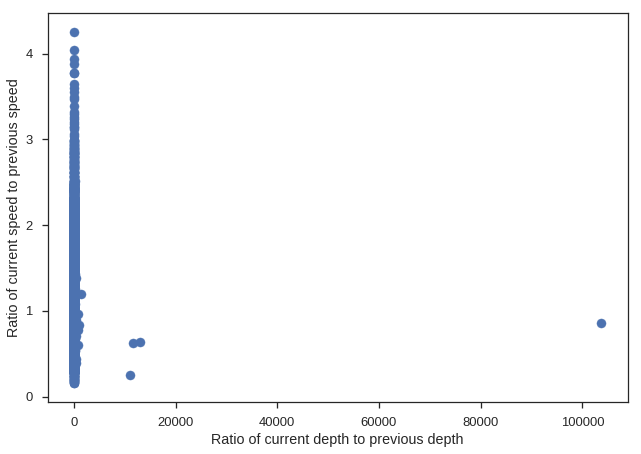

In [37]:
ratio_depth = (train['depth'] / train['previous.depth'])
ratio_speed = (train['speed'] / train['previous.speed'])

plt.scatter(ratio_depth, ratio_speed)
plt.xlabel('Ratio of current depth to previous depth')
plt.ylabel('Ratio of current speed to previous speed');

there are some erroneous values for depth, let's first look into those.

In [39]:
train['depth'].max(), train['depth'].min()

(11.886068760000001, 0.000282164)

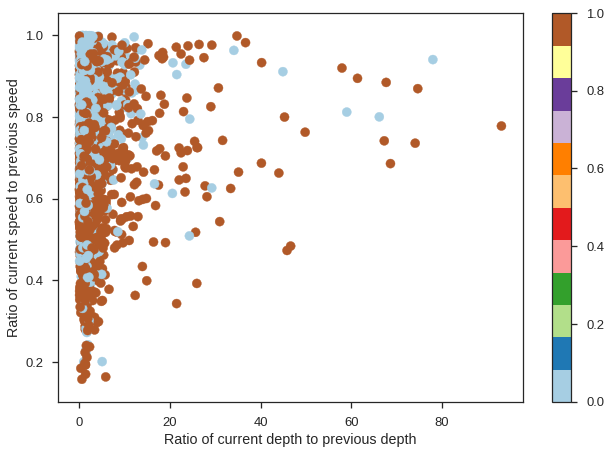

In [49]:
# mask to capture only ratio depth values of less than 100

mask = (ratio_depth < 100) & (ratio_speed < 1.)

plt.scatter(ratio_depth[mask  & (train.outcome != 'W')], ratio_speed[mask  & (train.outcome != 'W')], 
            c=train.loc[mask & (train.outcome != 'W'), 'outcome'].map({'UE': 0,
                                              'FE': 1
                                             }), cmap=plt.cm.Paired)

plt.xlabel('Ratio of current depth to previous depth')
plt.ylabel('Ratio of current speed to previous speed')
plt.colorbar()
plt.legend();

Lateral distance of ball bounce from sidelines for point-ending and penultimate shots can give us some clues.

If penultimate shot was sufficiently away from sidelines, then it would be easier for player to hit them and if point ending shot was close to sidelines then it would considered as forced error if player had to move a considerable distance.

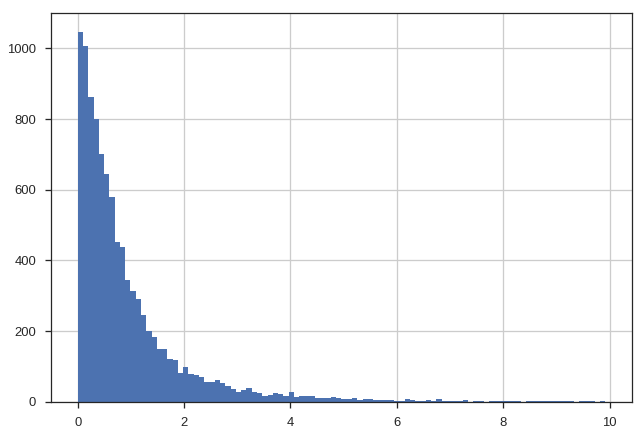

In [15]:
ratio_distance_sidelines = (train['distance.from.sideline'] / train['previous.distance.from.sideline'])

ratio_distance_sidelines[ratio_distance_sidelines < 10].hist(bins=100);

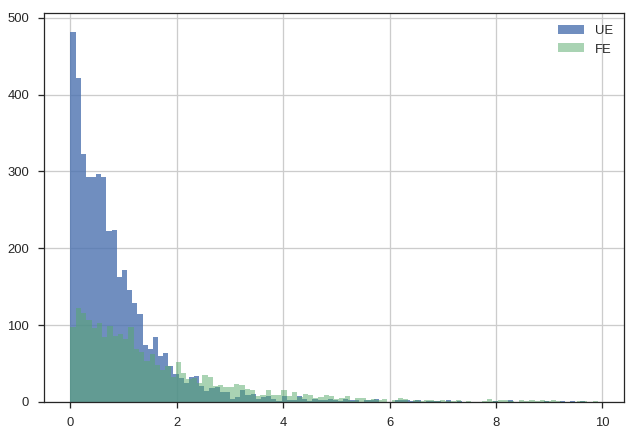

In [19]:
ratio_distance_sidelines[(train['outcome'] == 'UE') & (ratio_distance_sidelines < 10)].hist(bins=100, alpha=.8, label='UE')
ratio_distance_sidelines[(train['outcome'] == 'FE') & (ratio_distance_sidelines < 10)].hist(bins=100, alpha=.5, label='FE')

plt.legend();

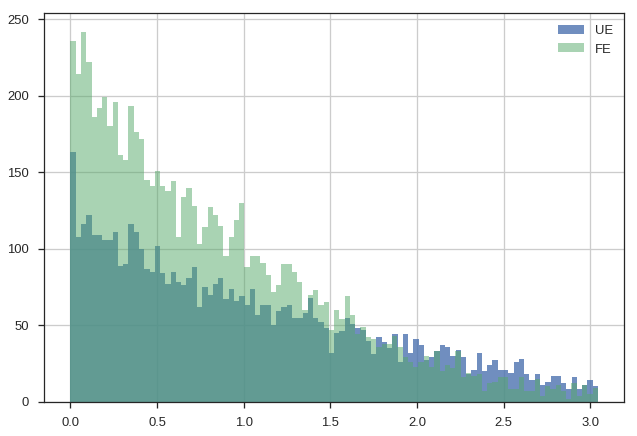

In [37]:
ratio_dist_travelled = (ratio_distance_sidelines * train['player.distance.travelled'])
mask = ratio_dist_travelled < 20

ratio_dist_travelled[mask & (train['outcome'] != 'UE')].map(np.log1p).hist(bins=100, alpha=.8, label='UE')
ratio_dist_travelled[mask & (train['outcome'] != 'FE')].map(np.log1p).hist(bins=100, alpha=.5, label='FE')

plt.legend();

If we could capture that player was forced into a difficult situation by a good shot, then error should be marked as  unforced error.

1. Player who made the error was under time constraint or was moving during shot execution.

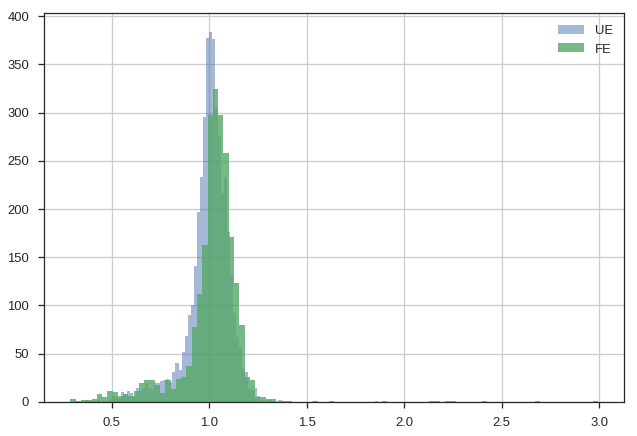

In [48]:
# this captures the ratio of depth of player's position from net from penultimate shot to 
# point ending shot.

ratio_player_depth = train['player.impact.depth'] / train['player.depth']

ratio_player_depth[(ratio_player_depth < 3) & (train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
ratio_player_depth[(ratio_player_depth < 3) & (train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend();

In [50]:
diff_player_depth = train['player.impact.depth'] - train['player.depth']

diff_player_depth[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
diff_player_depth[(train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend();

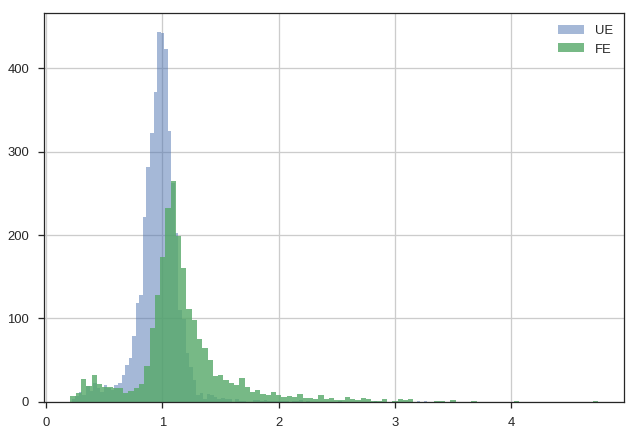

In [54]:
player_depth_comparison = (train['player.impact.depth'] / train['opponent.depth'])

player_depth_comparison[train['outcome'] == 'UE'].hist(bins=100, alpha=.5, label='UE')
player_depth_comparison[train['outcome'] == 'FE'].hist(bins=100, alpha=.8, label='FE')

plt.legend();

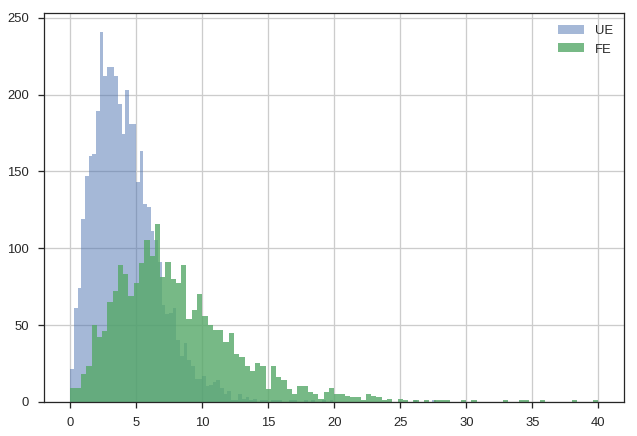

In [61]:
# calculate speed of penultimate shot

prev_shot_speed = (train['player.distance.travelled'] / train['previous.time.to.net'])

prev_shot_speed[(prev_shot_speed < 40) & (train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
prev_shot_speed[(prev_shot_speed < 40) & (train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend();

In [69]:
# let's look at unforced and forced errors
mask = train['outcome'] != 'W'

errors = train.loc[mask, ['rally', 'serve', 'hitpoint', 'outcome']]
errors.groupby(['outcome', 'hitpoint']).size().unstack()

hitpoint     B     F    U   V
outcome                      
FE         950  1097  150  75
UE        1874  2293  166  43

In [80]:
errors = train.loc[mask, ['net.clearance', 'distance.from.sideline', 'depth', 'outcome']]

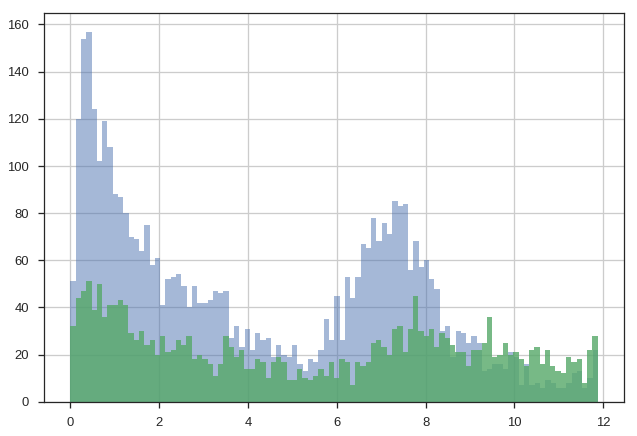

In [81]:
errors.loc[(errors['outcome'] == 'UE'), 'depth'].hist(bins=100, alpha=.5)
errors.loc[(errors['outcome'] == 'FE'), 'depth'].hist(bins=100, alpha=.8);

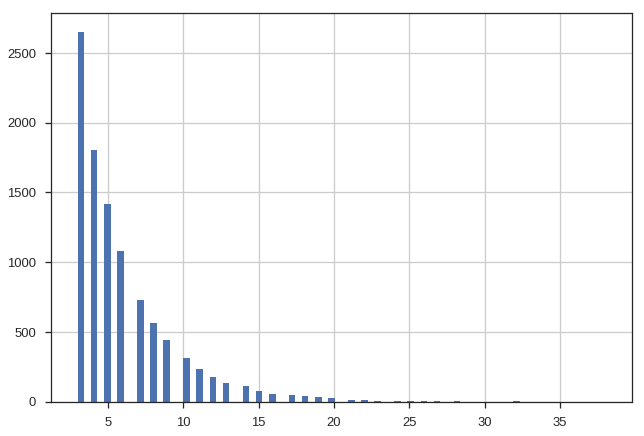

In [84]:
# distribution of rally across three categories
# it include serves and point-ending shots

train['rally'].hist(bins=80);

This represents what usually happens in the game rarely do rallies go beyond 10 shots.

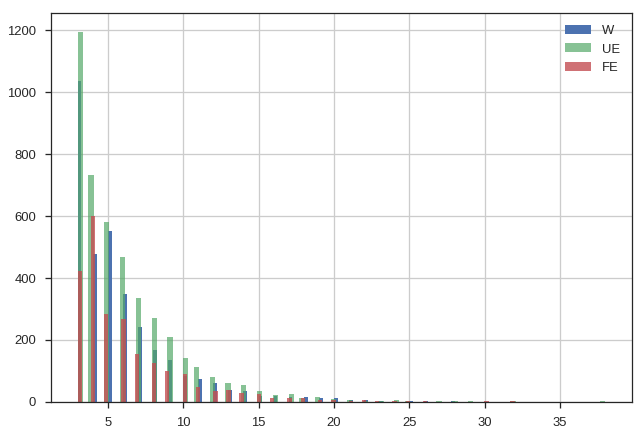

In [90]:
# distribution of rally by outcome
train.loc[(train['outcome'] == 'W'), 'rally'].hist(bins=100, label='W')
train.loc[(train['outcome'] == 'UE'), 'rally'].hist(bins=100, alpha=.7, label='UE')
train.loc[(train['outcome'] == 'FE'), 'rally'].hist(bins=100, alpha=.8, label='FE')

plt.legend(loc='best');

As we can see that most number of forced errors were marked on 4th shot of the rally and most winners on 6th, why is that so ?

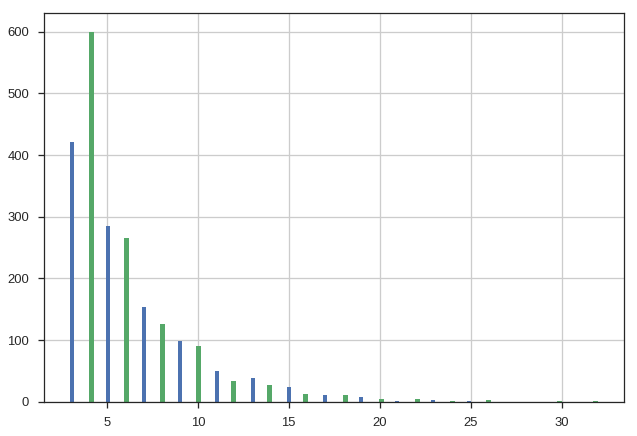

In [97]:
# does this have anything to do with the fact that point-ending shot was made by the server or not ?

train.loc[(train['server.is.impact.player'] == True) & (train['outcome'] == 'FE'), 'rally'].hist(bins=100)
train.loc[(train['server.is.impact.player'] == False) & (train['outcome'] == 'FE'), 'rally'].hist(bins=100);

This means that on the fourth shot of the point, the player facing the shot more often or not commits forced error.

In [102]:
# what is the most common shot category on the 4th shot
train.loc[(train['rally'] == 4), 'hitpoint'].value_counts(normalize=True)

F    0.504978
B    0.420354
U    0.044801
V    0.029867
Name: hitpoint, dtype: float64

In [104]:
# let's compare with frequency distribution of hitpoint
train.loc[:, 'hitpoint'].value_counts(normalize=True)

F    0.5506
B    0.3788
U    0.0537
V    0.0169
Name: hitpoint, dtype: float64

Slight increase in the frequency of forehand on the fourth shot.

** How to capture the fact that opponent player was off-balance when he/ she returned the point-ending shot ? **

1. Tried to encode a drop-shot.
2. Tried to encode a lob.
3. Tried to capture difference / ratio in shot speeds.
4. Tried to capture differene / ratio in player's depth between previous and point-ending shot.
5. Position of player before returning point-ending shot.
6. Whether player was in motion or not.

Drop shot: Shot in which ball is hit relatively softly, and lands just over and close to the net.

If for example opponent tries to return this shot and fails in doing so it will be considered as forced error if the opponent player was caught offguard ( suppose he/she is at the baseline ) and then they have to attempt to return it then it is a forced error as they have to cover lot of distance and in all other cases it should be marked as unforced error.

In [107]:
# distance of ball bounce from baseline ( depth ) is high and player distance from net ( player.impact.depth) 
# is high and 

train['depth'].hist(bins=100);

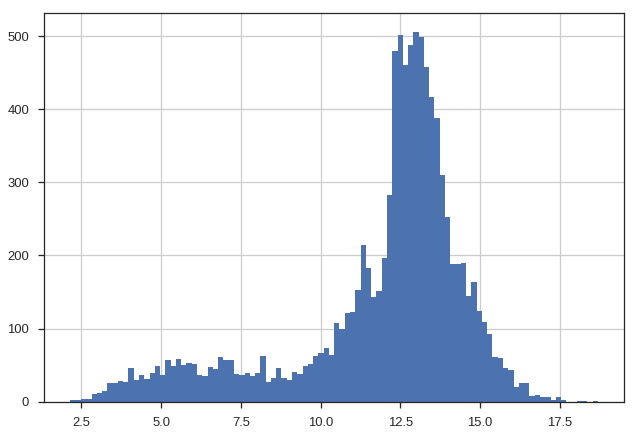

In [109]:
train['player.impact.depth'].hist(bins=100);

In [116]:
mask = (train['depth'] >= 9) & (train['player.impact.depth'] >= 12.5) & (train['outcome']  != 'W')

train.loc[mask, 'outcome'].value_counts()

FE    344
UE    188
Name: outcome, dtype: int64

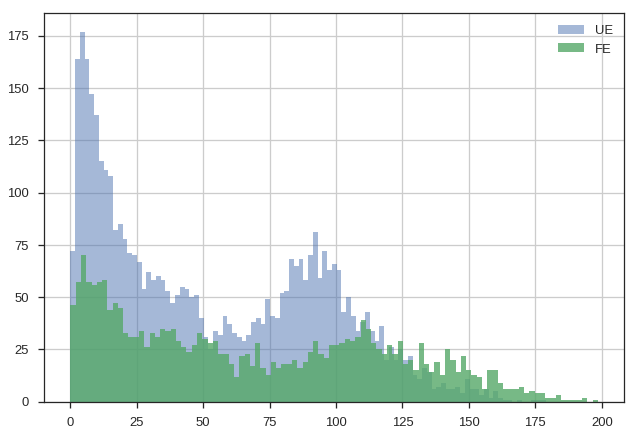

In [118]:
# let's try to encode this by multiplying depth with player.impact.depth
# high values signify ball is dropped close to the net and player is stood at the baseline

ball_player_depth_relation = (train['depth'] * train['player.impact.depth'])

ball_player_depth_relation.loc[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
ball_player_depth_relation.loc[(train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend();

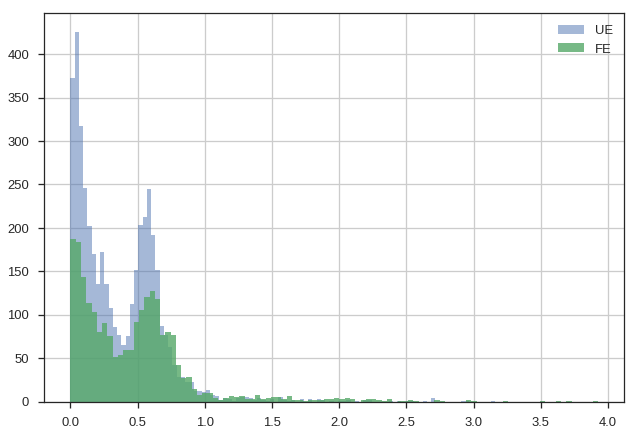

In [119]:
# let's try to encode a situation where a player is trying to return a lob shot attempted by his/her opponent
# now for this ball bounce distance from baseline should not be very large and player distance from net would be
# very low.

lob_shot_depth_relation = train['depth'] / train['player.impact.depth']

lob_shot_depth_relation.loc[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
lob_shot_depth_relation.loc[(train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend();

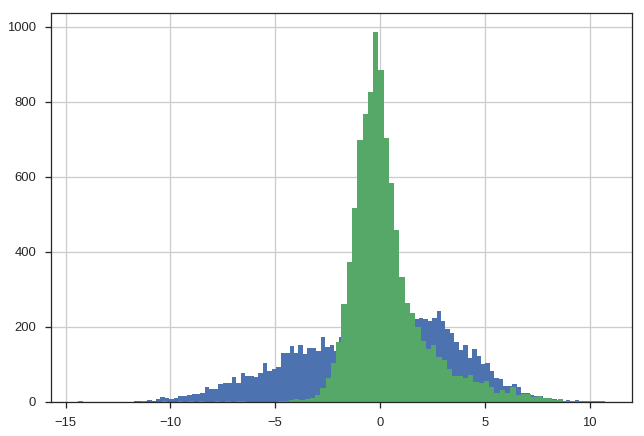

In [122]:
# let's also compare position of ball bounce of last two shots with distance travelled by player during 
# that period.

ball_position_comparison   = (train['previous.depth'] - train['depth'])
player_position_comparison = (train['player.depth'] - train['player.impact.depth'])

ball_position_comparison.hist(bins=100)
player_position_comparison.hist(bins=100);

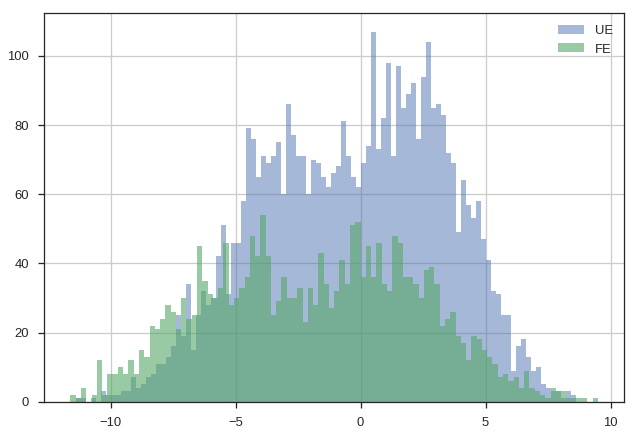

In [124]:
ball_position_comparison[(train['outcome'] == 'UE')].hist(bins=100, alpha=0.5, label='UE')
ball_position_comparison[(train['outcome'] == 'FE')].hist(bins=100, alpha=0.6, label='FE')

plt.legend(loc='best');

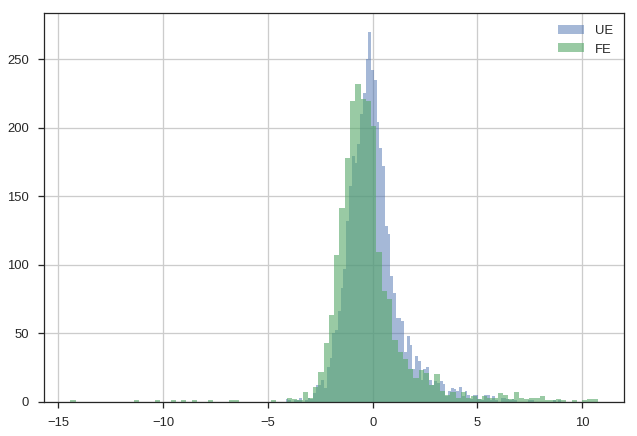

In [125]:
player_position_comparison[(train['outcome'] == 'UE')].hist(bins=100, alpha=0.5, label='UE')
player_position_comparison[(train['outcome'] == 'FE')].hist(bins=100, alpha=0.6, label='FE')

plt.legend(loc='best');

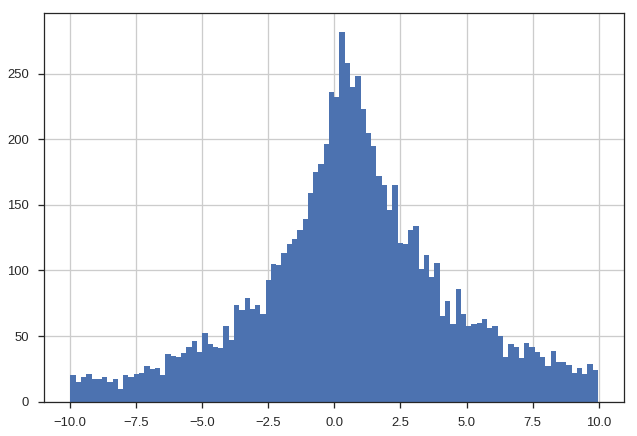

In [135]:
compare_ball_player_positions = (ball_position_comparison) / (player_position_comparison)

compare_ball_player_positions[(compare_ball_player_positions < 10) &\
                              (compare_ball_player_positions > -10) &\
                              (np.isfinite(compare_ball_player_positions))].hist(bins=100);

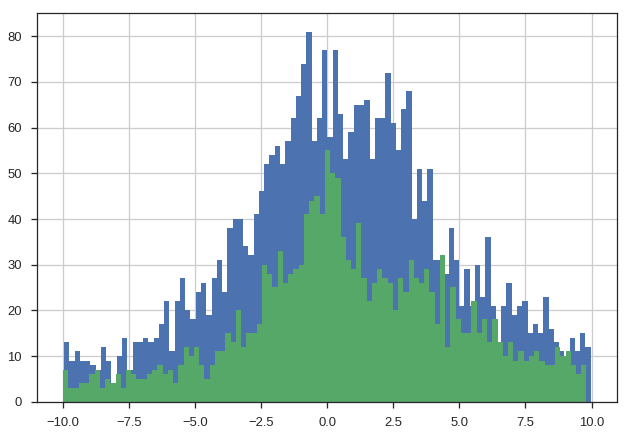

In [136]:
compare_ball_player_positions[(compare_ball_player_positions < 10) &\
                              (compare_ball_player_positions > -10) &\
                              (train['outcome'] == 'UE') &\
                              (np.isfinite(compare_ball_player_positions))].hist(bins=100)

compare_ball_player_positions[(compare_ball_player_positions < 10) &\
                              (compare_ball_player_positions > -10) &\
                              (train['outcome'] == 'FE') &\
                              (np.isfinite(compare_ball_player_positions))].hist(bins=100)

plt.legend();

This didn't work out as expected but should revisit it and see what went wrong this feature ?

** What if lateral distance of ball from sidelines across last two shots of point is low but player covered large distances indicate that player covered huge distance to return final and credit to opponent for making him/her off-balance ? If player ends up not returing the shot then it should be considered as forced error. **

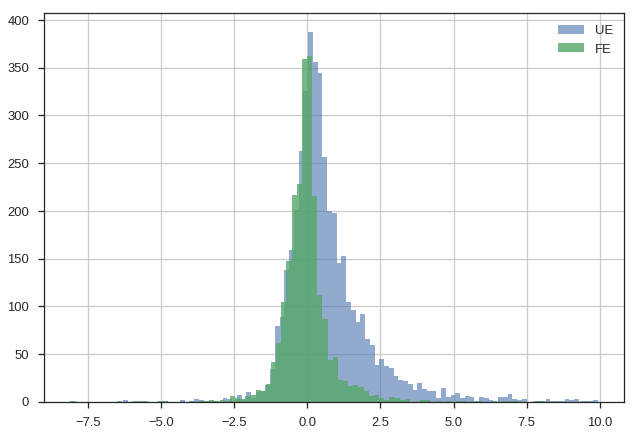

In [143]:
distance_sidelines_across_shots = train['previous.distance.from.sideline'] - train['distance.from.sideline']

compare_ball_player_dist_sideline = (distance_sidelines_across_shots / train['player.distance.travelled'])

mask = (np.isfinite(compare_ball_player_dist_sideline)) & (compare_ball_player_dist_sideline > -10) &\
        (compare_ball_player_dist_sideline < 10)
    
compare_ball_player_dist_sideline[mask & (train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='UE')
compare_ball_player_dist_sideline[mask & (train['outcome'] == 'FE')].hist(bins=100, alpha=.8, label='FE')

plt.legend(loc='best');

** Explore the relationship between change in ball speed with distance covered by player across last two shots **

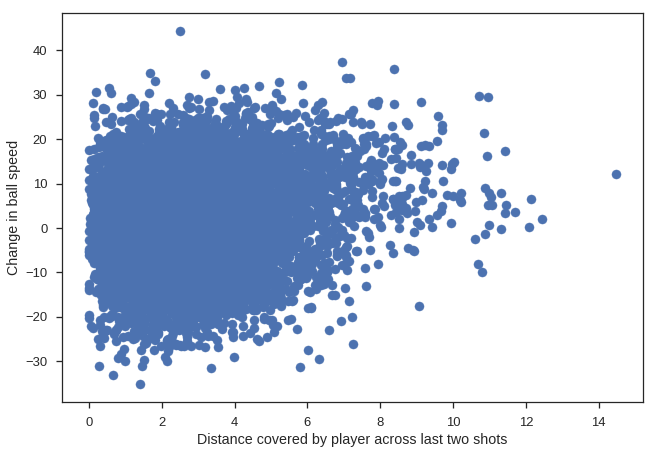

In [146]:
speed_difference = train['speed'] - train['previous.speed']

plt.scatter(train['player.distance.travelled'], speed_difference)
plt.xlabel('Distance covered by player across last two shots')
plt.ylabel('Change in ball speed');

So relationship is not quite linear.

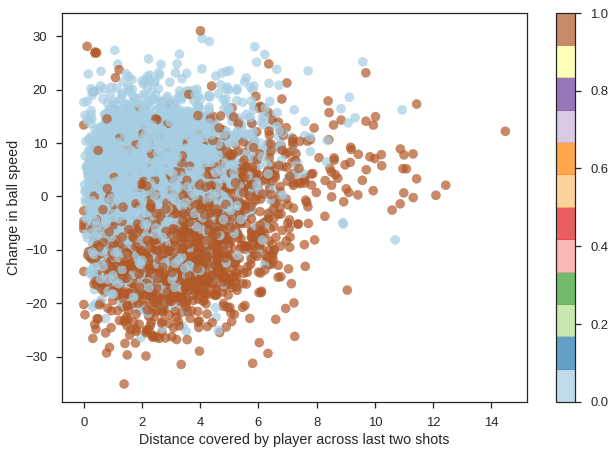

In [150]:
# let's encode this with outcome type ( only faults )
mask = (train['outcome'] != 'W')

plt.scatter(train.loc[mask, 'player.distance.travelled'], 
            speed_difference[mask], 
            c=train.loc[mask, 'outcome'].map({'UE': 0, 'FE': 1}),
            cmap=plt.cm.Paired,
            alpha=.7
           )
plt.colorbar()
plt.xlabel('Distance covered by player across last two shots')
plt.ylabel('Change in ball speed');

** Let's look at distance of point-ending shot from baseline and distance of player who made point-ending shot from the net at the time the penultimate shot was made. If difference is close to zero, then it would be difficult to make the shot and should be considered as winner. **

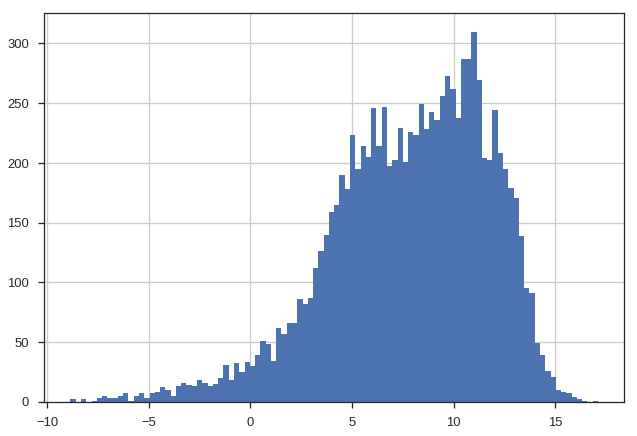

In [155]:
diff_ball_baseline_player_net = (train['player.depth'] - train['depth'])

diff_ball_baseline_player_net.hist(bins=100);

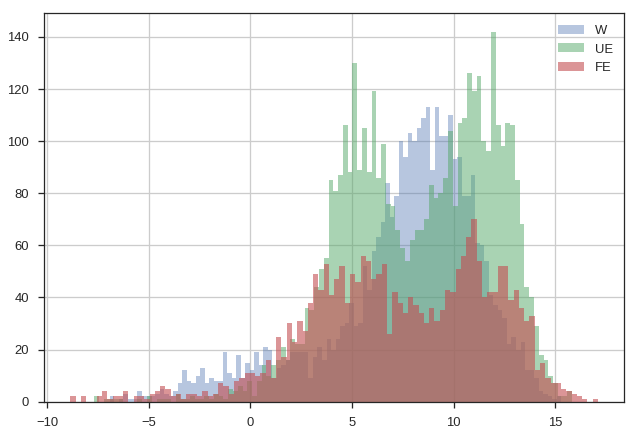

In [159]:
diff_ball_baseline_player_net[(train['outcome'] == 'W')].hist(bins=100, alpha=.4, label='W')
diff_ball_baseline_player_net[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
diff_ball_baseline_player_net[(train['outcome'] == 'FE')].hist(bins=100, alpha=.6, label='FE')

plt.legend(loc='best');

** Characterisitics of some tough shots **.

- Ball drops close to net and sideline ( either one of them ) and player is at baseline.

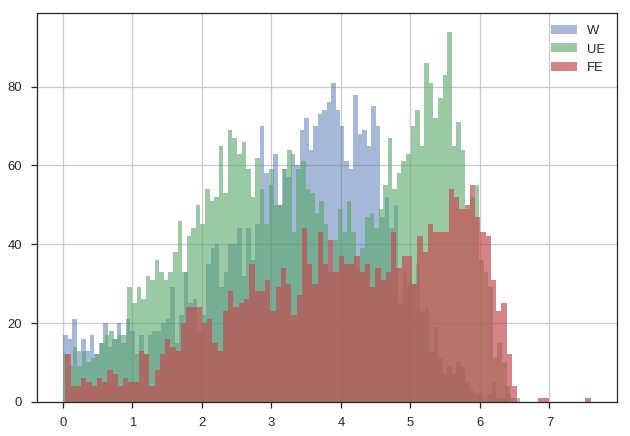

In [29]:
drop_shot_difficulty = (train['distance.from.sideline'] * train['depth']) * train['player.depth']

drop_shot_difficulty[(train['outcome'] == 'W')].map(np.log1p).hist(alpha=.5, bins=100, label='W')
drop_shot_difficulty[(train['outcome'] == 'UE')].map(np.log1p).hist(alpha=.6, bins=100, label='UE')
drop_shot_difficulty[(train['outcome'] == 'FE')].map(np.log1p).hist(alpha=.7, bins=100, label='FE')

plt.legend();

** What if penultimate shot just brushes past the net and then player can't do much should be considered as winner not forced error ? **

In [166]:
train.loc[(train['outcome'] == 'W'), 'previous.net.clearance'].hist(bins=100, label='W', alpha=.5)
train.loc[(train['outcome'] == 'UE'), 'previous.net.clearance'].hist(bins=100, label='UE', alpha=.6)
train.loc[(train['outcome'] == 'FE'), 'previous.net.clearance'].hist(bins=100, label='FE', alpha=.7)

plt.legend();

In [169]:
# relationship between previous net clearance and clearance on point-ending shot
plt.scatter(train['previous.net.clearance'],
            train['net.clearance'],
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

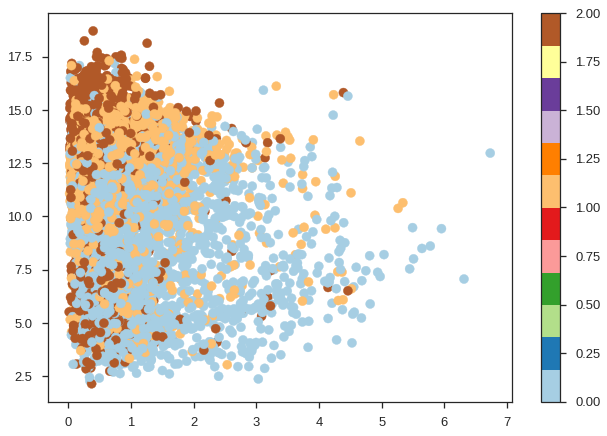

In [170]:
# previous net clearance from player's depth from net
plt.scatter(train['previous.net.clearance'],
            train['player.impact.depth'],
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

In [177]:
net_clearance_player_position = (train['previous.net.clearance'] / train['player.impact.depth'])

net_clearance_player_position[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='W')
net_clearance_player_position[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='UE')
net_clearance_player_position[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7, label='FE')

plt.legend();

Cross angeled shot

- Distance travelled from player is high, (previous ball and current ball bounce distance from sideline is low),
 previous and current ball bounce distance from net is high ( which means from baseline is low ).

In [194]:
player_distance_travelled = train['player.distance.travelled']

final_shot_ball_bounce_from_sideline    = train['distance.from.sideline']
previous_shot_ball_bounce_from_sideline = train['previous.distance.from.sideline']

final_shot_ball_bounce_from_baseline    = train['depth']
previous_shot_ball_bounce_from_baseline = train['previous.depth']

interaction = player_distance_travelled / \
             (final_shot_ball_bounce_from_sideline - previous_shot_ball_bounce_from_sideline) *\
             (final_shot_ball_bounce_from_baseline - previous_shot_ball_bounce_from_baseline)

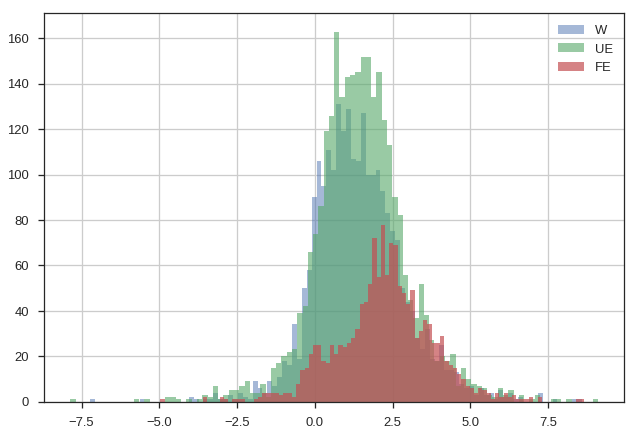

In [195]:
interaction[(train['outcome'] == 'W')].map(np.log1p).hist(bins=100, label='W', alpha=.5)
interaction[(train['outcome'] == 'UE')].map(np.log1p).hist(bins=100, label='UE', alpha=.6)
interaction[(train['outcome'] == 'FE')].map(np.log1p).hist(bins=100, label='FE', alpha=.7)

plt.legend(loc='best');

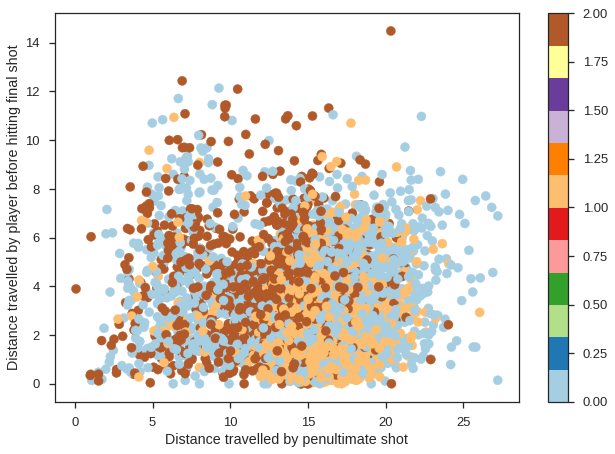

In [197]:
# distance travelled by penultimate shot vs distance travelled by opponent.
distance_travelled_by_penultimate_shot = train['previous.speed'] * train['previous.time.to.net']
distance_travelled_by_player           = train['player.distance.travelled']

plt.scatter(distance_travelled_by_penultimate_shot, distance_travelled_by_player,
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )
plt.colorbar()

plt.xlabel('Distance travelled by penultimate shot')
plt.ylabel('Distance travelled by player before hitting final shot');

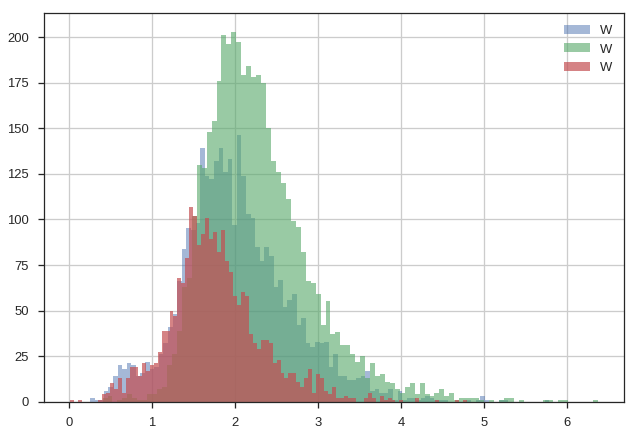

In [202]:
compare_ball_player_coverage_penultimate = (distance_travelled_by_penultimate_shot / distance_travelled_by_player)


mask = np.isfinite(compare_ball_player_coverage_penultimate)

compare_ball_player_coverage_penultimate[mask & (train['outcome'] == 'W')].map(np.log1p).hist(bins=100, alpha=.5, label='W')
compare_ball_player_coverage_penultimate[mask & (train['outcome'] == 'UE')].map(np.log1p).hist(bins=100, alpha=.6, label='W')
compare_ball_player_coverage_penultimate[mask & (train['outcome'] == 'FE')].map(np.log1p).hist(bins=100, alpha=.7, label='W')

plt.legend();

** Passing shot **

1. When the opponent is close to net and you are at baseline and you have to make a shot ( that shot is called passing shot) and if you miss, then it most often or not is considered as a forced error.

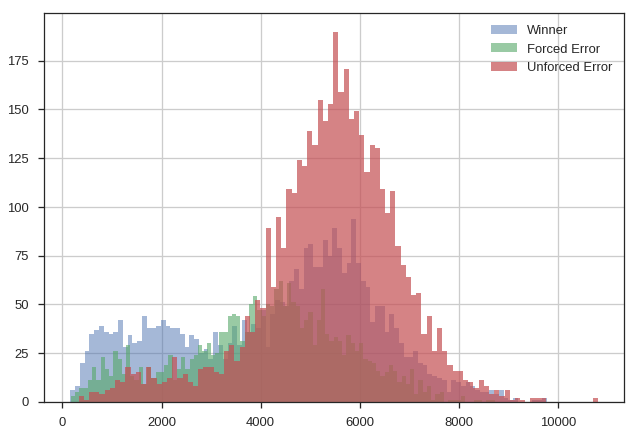

In [209]:
# version 1

passing_shot = train['player.impact.depth'] * train['opponent.depth'] * train['speed']

passing_shot[train['outcome'] == 'W'].hist(bins=100, alpha=.5, label='Winner')
passing_shot[train['outcome'] == 'FE'].hist(bins=100, alpha=.6, label='Forced Error')
passing_shot[train['outcome'] == 'UE'].hist(bins=100, alpha=.7, label='Unforced Error')

plt.legend();

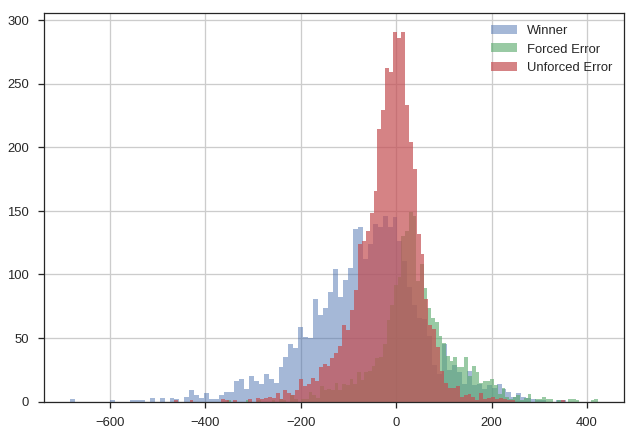

In [210]:
# version 2

passing_shot = (train['player.impact.depth'] - train['opponent.depth']) * train['speed']

passing_shot[train['outcome'] == 'W'].hist(bins=100, alpha=.5, label='Winner')
passing_shot[train['outcome'] == 'FE'].hist(bins=100, alpha=.6, label='Forced Error')
passing_shot[train['outcome'] == 'UE'].hist(bins=100, alpha=.7, label='Unforced Error')

plt.legend();

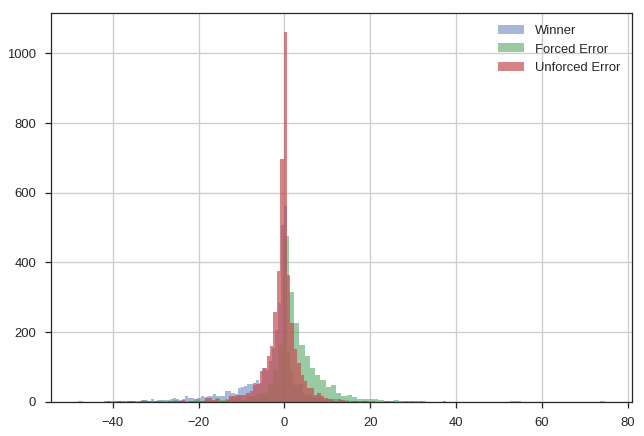

In [216]:
# version 3

passing_shot = (train['player.impact.depth']  train['opponent.depth']) * train['distance.from.sideline']

passing_shot[train['outcome'] == 'W'].hist(bins=100, alpha=.5, label='Winner')
passing_shot[train['outcome'] == 'FE'].hist(bins=100, alpha=.6, label='Forced Error')
passing_shot[train['outcome'] == 'UE'].hist(bins=100, alpha=.7, label='Unforced Error')

plt.legend();

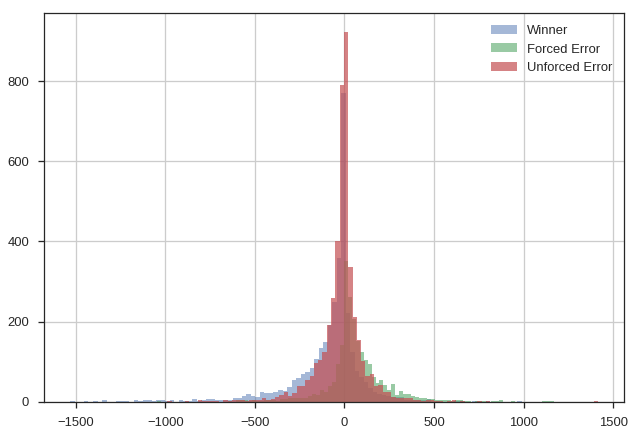

In [217]:
# version 4

passing_shot = (train['player.impact.depth'] - train['opponent.depth']) * train['distance.from.sideline'] * train['speed']

passing_shot[train['outcome'] == 'W'].hist(bins=100, alpha=.5, label='Winner')
passing_shot[train['outcome'] == 'FE'].hist(bins=100, alpha=.6, label='Forced Error')
passing_shot[train['outcome'] == 'UE'].hist(bins=100, alpha=.7, label='Unforced Error')

plt.legend();

** Difference of ball speeds on last two shots **

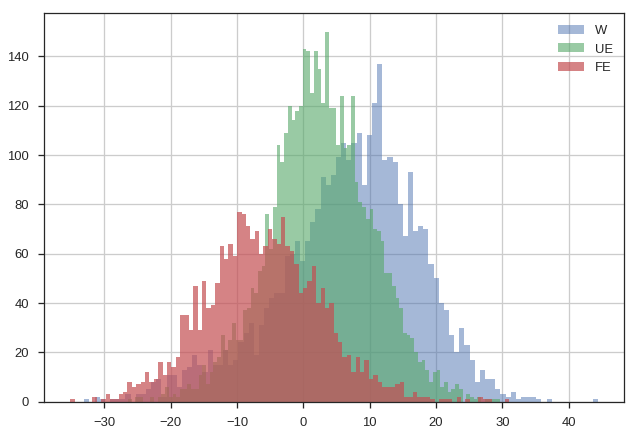

In [6]:
ball_speed_diff = (train['speed'] - train['previous.speed'])

ball_speed_diff[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='W')
ball_speed_diff[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='UE')
ball_speed_diff[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7, label='FE')

plt.legend();

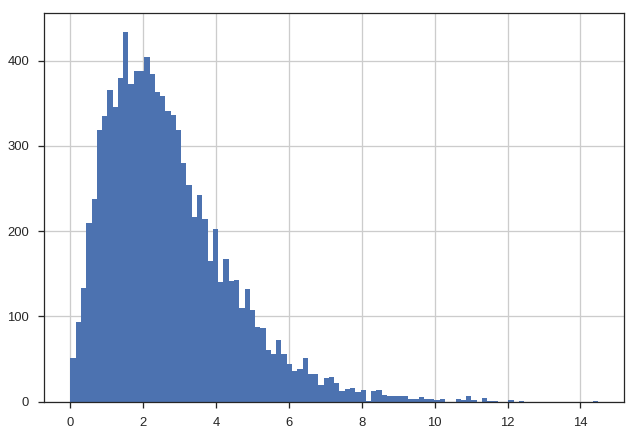

In [11]:
# distribution of distance travelled
train['player.distance.travelled'].hist(bins=100);

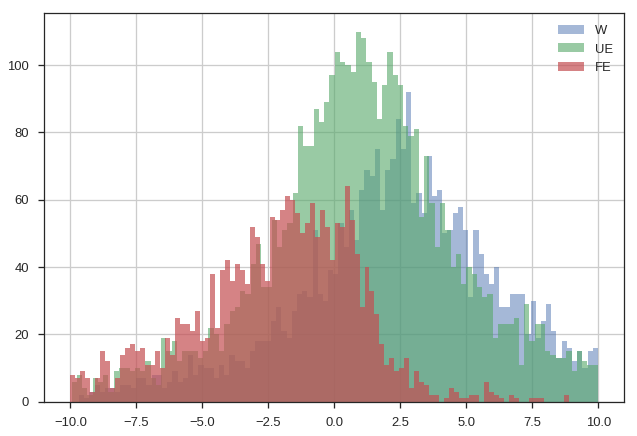

In [15]:
# relate difference in ball speeds with distance travelled by player making point
# ending shot
time_to_approach_shot = (ball_speed_diff / train['player.distance.travelled'])

mask = (np.isfinite(time_to_approach_shot)) & (time_to_approach_shot > -10) & (time_to_approach_shot < 10)
time_to_approach_shot[mask & (train['outcome'] == 'W')].hist(bins=100, label='W', alpha=.5)
time_to_approach_shot[mask & (train['outcome'] == 'UE')].hist(bins=100, label='UE', alpha=.6)
time_to_approach_shot[mask & (train['outcome'] == 'FE')].hist(bins=100, label='FE', alpha=.7)

plt.legend();

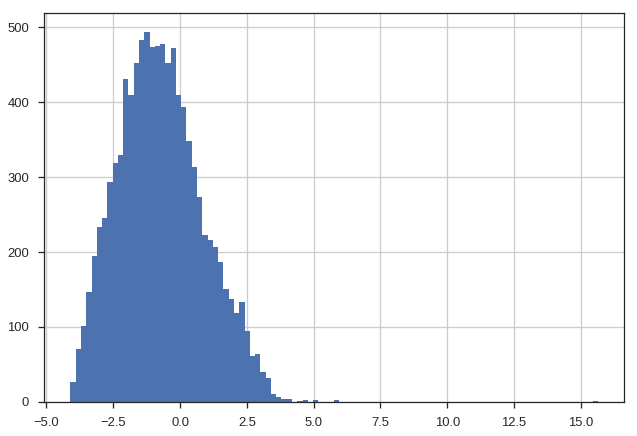

In [19]:
# difference between lateral distance of ball bounce from sideline
lateral_sideline_diff = (train['distance.from.sideline'] - train['previous.distance.from.sideline'])

lateral_sideline_diff.hist(bins=100);

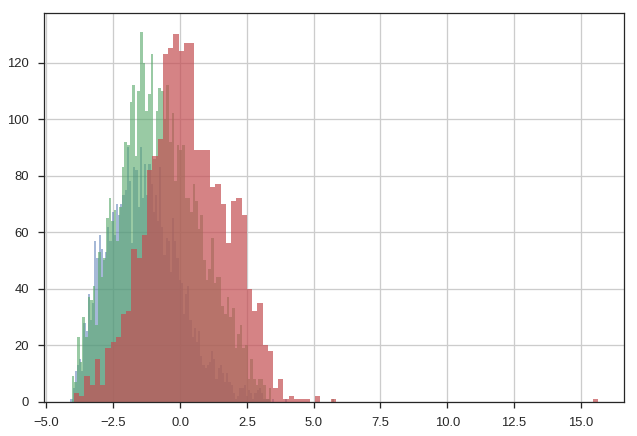

In [22]:
lateral_sideline_diff[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
lateral_sideline_diff[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
lateral_sideline_diff[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

** Relationship between speed difference and distance of ball bounce from baseline. **

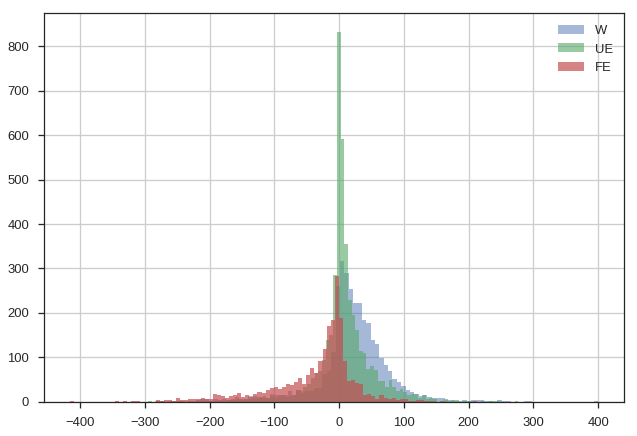

In [35]:
speed_diff = (train['speed'] - train['previous.speed'])
drop_shot_near_net = speed_diff * train['depth']

drop_shot_near_net[(train['outcome'] == 'W')].hist(bins=100, label='W', alpha=.5)
drop_shot_near_net[(train['outcome'] == 'UE')].hist(bins=100, label='UE', alpha=.6)
drop_shot_near_net[(train['outcome'] == 'FE')].hist(bins=100, label='FE', alpha=.7)

plt.legend();

** What happens when ball speed goes down ? **

In [51]:
pd.crosstab((speed_diff < 0).astype('str'),
            train['outcome']
           )

outcome    FE    UE     W
row_0                    
False     546  2790  2588
True     1726  1586   764

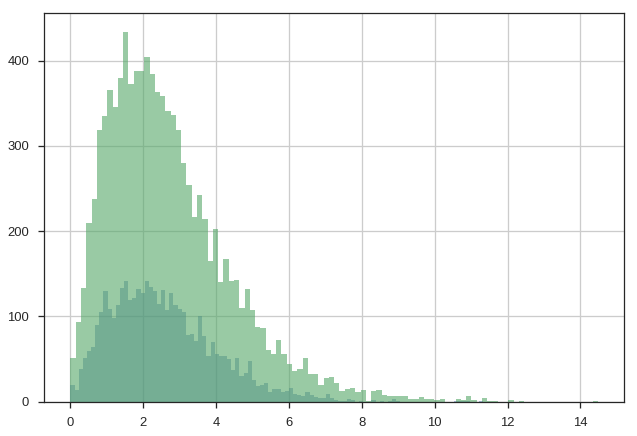

In [56]:
train.loc[(speed_diff < 0), 'player.distance.travelled'].hist(bins=100, alpha=.5)
train.loc[:, 'player.distance.travelled'].hist(bins=100, alpha=.6)

plt.legend();

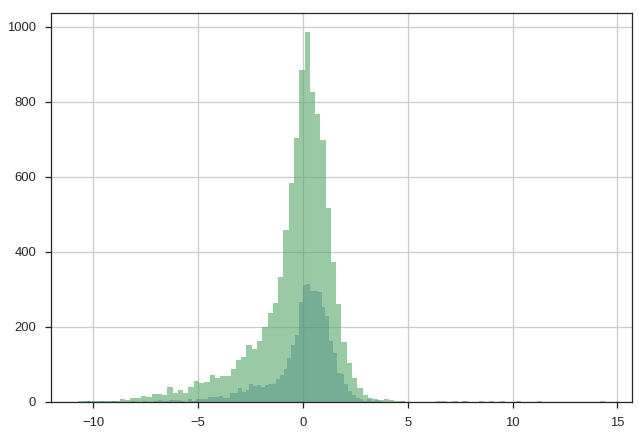

In [59]:
depth_diff = train['player.impact.depth'] - train['player.depth']

depth_diff[(speed_diff < 0)].hist(bins=100, alpha=.5)
depth_diff.hist(bins=100, alpha=.6)

plt.legend();

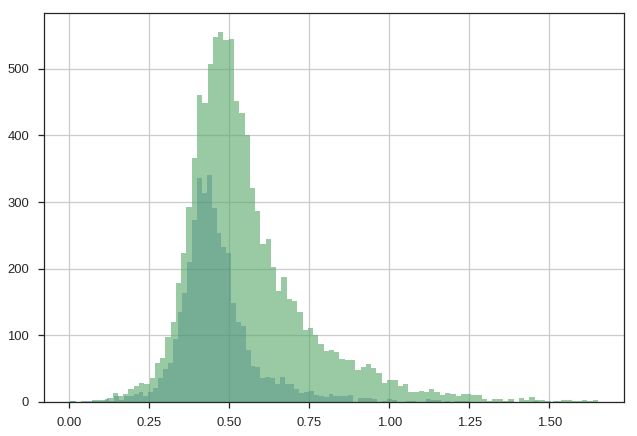

In [65]:
train.loc[(speed_diff < 0), 'previous.time.to.net'].hist(bins=100, alpha=.5)
train.loc[:, 'previous.time.to.net'].hist(bins=100, alpha=.6)

plt.legend();

** Let's explore relationship between difference in ball speeds and time for penultimate to be hit and pass over the 
net. **

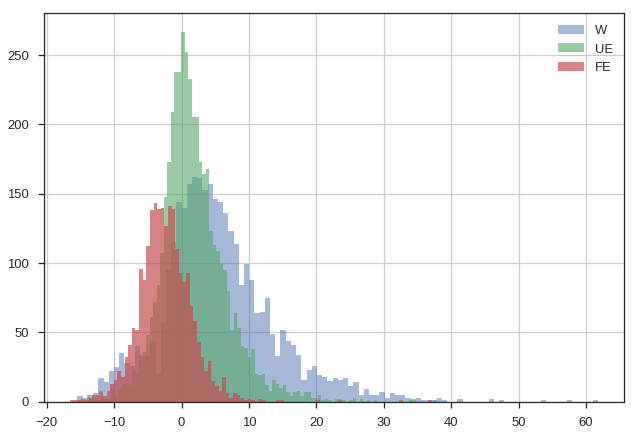

In [69]:
drop_shot_char = speed_diff * train['previous.time.to.net']

drop_shot_char[(train['outcome'] == 'W')].hist(bins=100, label='W', alpha=.5)
drop_shot_char[(train['outcome'] == 'UE')].hist(bins=100, label='UE', alpha=.6)
drop_shot_char[(train['outcome'] == 'FE')].hist(bins=100, label='FE', alpha=.7)

plt.legend();

** What if shot was played at two horizontal extremes of the court ? **

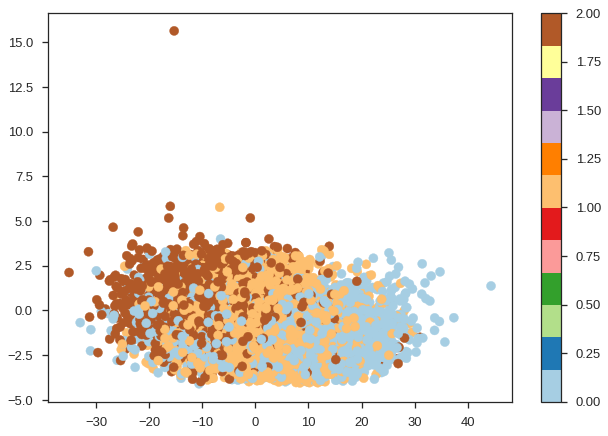

In [72]:
plt.scatter((train['speed'] - train['previous.speed']),
            (train['distance.from.sideline'] - train['previous.distance.from.sideline']),
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

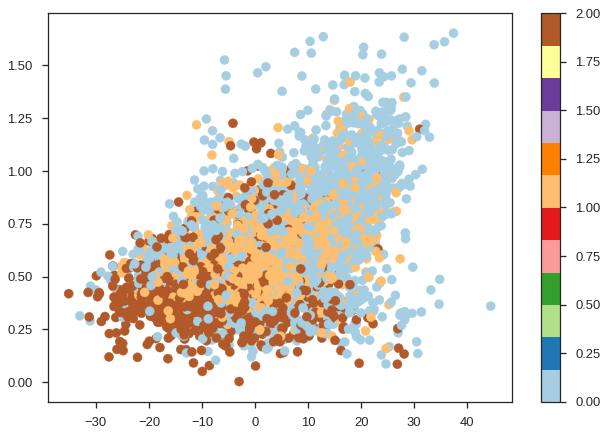

In [74]:
plt.scatter((train['speed'] - train['previous.speed']),
            (train['previous.time.to.net']),
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

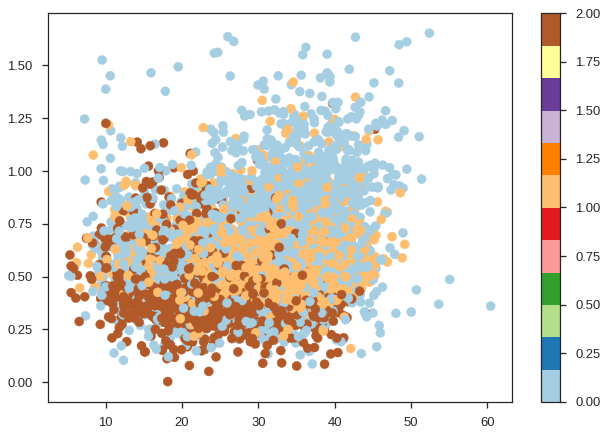

In [75]:
plt.scatter((train['speed']),
            (train['previous.time.to.net']),
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

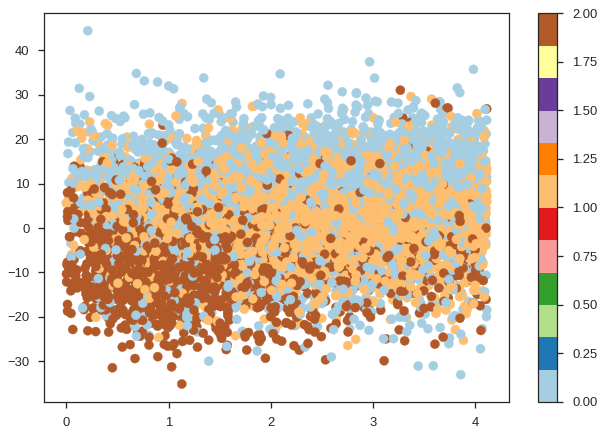

In [78]:
plt.scatter((train['previous.distance.from.sideline']),
            (train['speed'] - train['previous.speed']),
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

Relationship between distance travelled by ball vs distance travelled by player.

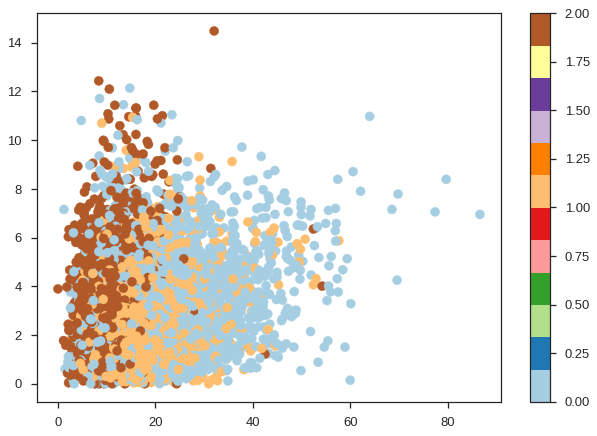

In [89]:
distance_travelled_by_ball   = train['speed'] * train['previous.time.to.net']
distance_travelled_by_player = train['player.distance.travelled'] 

plt.scatter(distance_travelled_by_ball,
            distance_travelled_by_player,
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

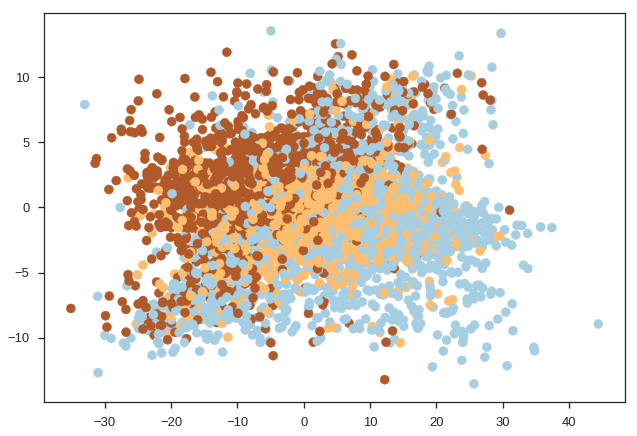

In [91]:
# speed difference vs depth difference between players
plt.scatter((train['speed'] - train['previous.speed']),
            (train['player.depth'] - train['opponent.depth']),
            c=train['outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           );

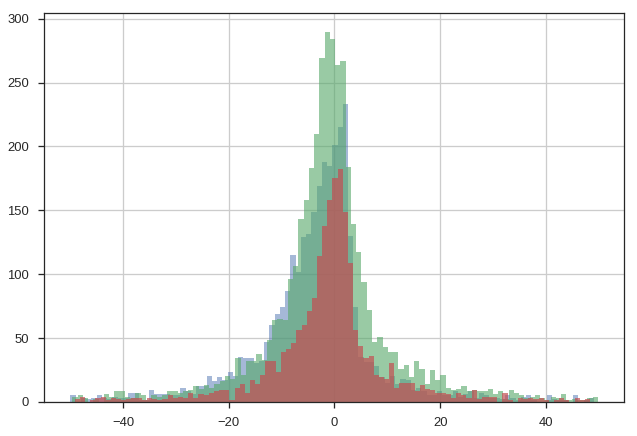

In [99]:
ss = ((train['speed'] - train['previous.speed']) / (train['player.depth'] - train['opponent.depth']))

mask = (np.isfinite(ss)) & (ss > -50) & (ss < 50)

ss[mask & (train['outcome'] == 'W')].hist(bins=100, alpha=.5)
ss[mask & (train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
ss[mask & (train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

** What happens when net clearance is negative, how do we then differentate between unforced and forced error ? **

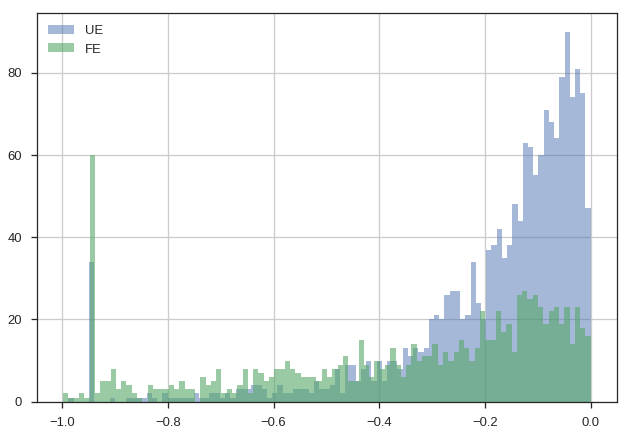

In [107]:
mask = (train['net.clearance'] < 0)

train.loc[mask & (train.outcome == 'UE'), 'net.clearance'].hist(bins=100, alpha=.5, label='UE')
train.loc[mask & (train.outcome == 'FE'), 'net.clearance'].hist(bins=100, alpha=.6, label='FE')

plt.legend(loc='best');

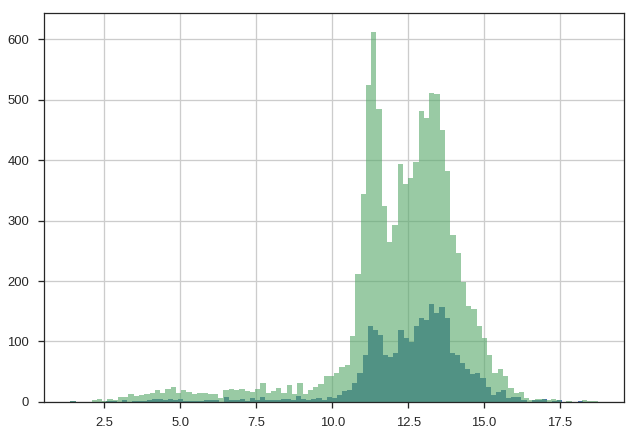

In [111]:
train.loc[mask, 'player.depth'].hist(bins=100)
train.loc[:, 'player.depth'].hist(bins=100, alpha=.6);

### Analysis of player positions when ball is unable to pass over the net

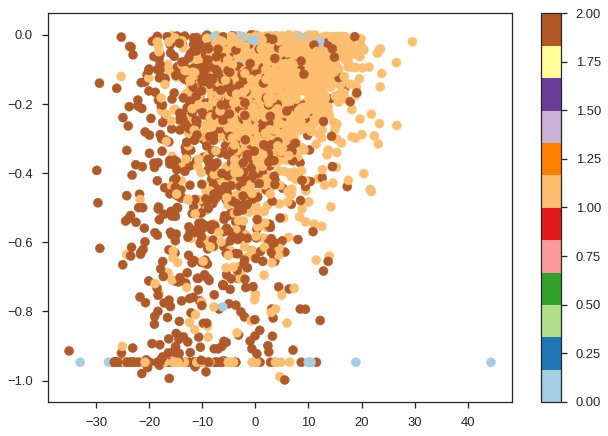

In [115]:
mask = (train['net.clearance'] < 0)

# Q1) Does ball hitting the net has anything to do with sudden change in ball speed ?

plt.scatter((train.loc[mask, 'speed'] - train.loc[mask, 'previous.speed']),
            (train.loc[mask, 'net.clearance']),
            c=train.loc[mask, 'outcome'].map({'W': 0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           )

plt.colorbar();

** Looks like when there is a drop shot (decrease speed) then it is considered as forced error. **

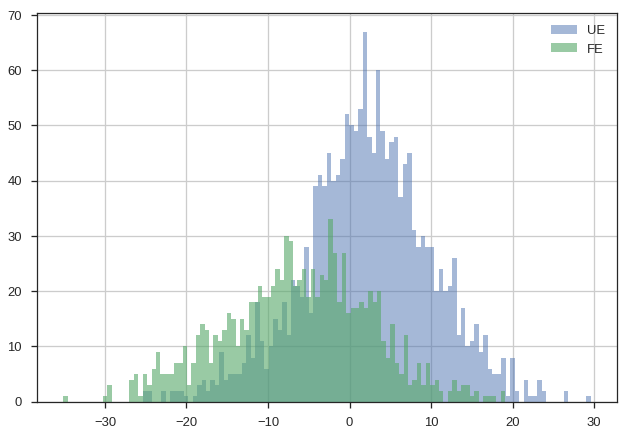

In [121]:
# Q2) Does rate of decrease has any effect on outcome when net.clearance < 0 ?

rate_speed = (train.loc[mask, 'speed'] - train.loc[mask, 'previous.speed']) / (train.loc[mask, 'previous.time.to.net'])

rate_speed[(train.loc[mask, 'outcome'] == 'UE')].hist(bins=100, alpha=.5, label='UE')
rate_speed[(train.loc[mask, 'outcome'] == 'FE')].hist(bins=100, alpha=.6, label='FE')

plt.legend(loc='best');

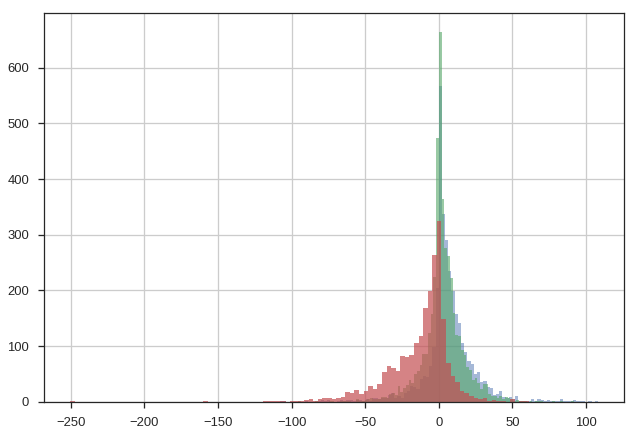

In [125]:
# Q3) Does it affect point's outcome, where ball falls when we make drop shot ?

ss = ((train['speed'] - train['previous.speed']) * train['distance.from.sideline'])

ss[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
ss[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
ss[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

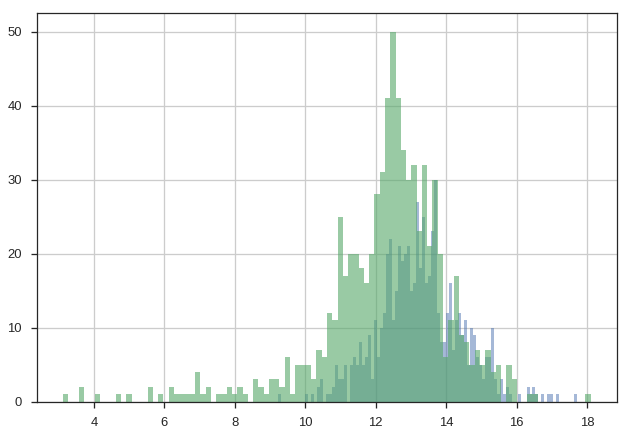

In [136]:
# Q4) Does it matter that opponent player was closer to net when he made that drop shot with the outcome ?
mask = (train['net.clearance'] < 0)

ss = train.loc[mask & (speed_diff < 0), ['opponent.depth', 'outcome']]

ss.loc[(ss['outcome'] == 'UE'), 'opponent.depth'].hist(bins=100, alpha=.5)
ss.loc[(ss['outcome'] == 'FE'), 'opponent.depth'].hist(bins=100, alpha=.6);

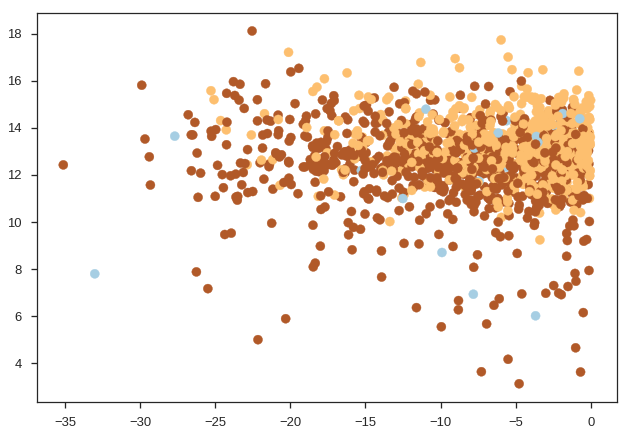

In [141]:
plt.scatter(speed_diff[mask & (speed_diff < 0)], train.loc[mask & (speed_diff < 0), 'opponent.depth'],
            c=train.loc[mask & (speed_diff < 0), 'outcome'].map({'W':0, 'UE': 1, 'FE': 2}),
            cmap=plt.cm.Paired
           );

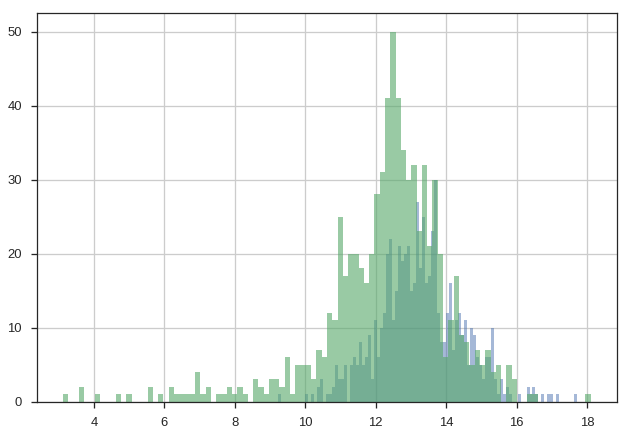

In [145]:
opponent_depth_on_drop_shot = train.loc[mask & (speed_diff < 0), ['opponent.depth', 'outcome']]

opponent_depth_on_drop_shot.loc[opponent_depth_on_drop_shot['outcome'] == 'UE', 'opponent.depth'].hist(bins=100, alpha=.5)
opponent_depth_on_drop_shot.loc[opponent_depth_on_drop_shot['outcome'] == 'FE', 'opponent.depth'].hist(bins=100, alpha=.6)

plt.legend(loc='best');

In [156]:
# difference of player's position from center
diff_player_pos_from_center = (train.loc[(train['net.clearance'] < 0), 'player.distance.from.center'] -\
train.loc[(train['net.clearance'] < 0), 'player.impact.distance.from.center'])

diff_player_pos_from_center[(train.loc[(train['net.clearance'] < 0), 'outcome'] == 'UE')].hist(bins=100, alpha=0.5)
diff_player_pos_from_center[(train.loc[(train['net.clearance'] < 0), 'outcome'] == 'FE')].hist(bins=100, alpha=0.6);

## IDEAS

a) Methods to create a given action ( drop shot, cross-angeled shot etc ... )

Notes:

- Describe what shot looks like and then look at the distribution of outcome.

In [167]:
"""
Winner down the sideline, player who makes the point-ending shot hits the ball down 
one of the sidelines and the opponent is at the other side of the court and is unable to
reach the shot.

Characterisitics of the shot

a) High speed.
b) Ball bounce is very close to sideline for player receiving this winner.
c) Opponent at the other side of the court.
"""

def down_the_line_winner(train):
    mask = (train['speed'] > train['speed'].quantile(q=.75)) &\
           (train['distance.from.sideline'] < train['distance.from.sideline'].quantile(q=0.25)) &\
           (train['player.distance.travelled'] > train['player.distance.travelled'].quantile(q=0.75))
    
    print('Total number of such shots made: {}'.format(mask.sum()))
    print('Coverage: {}'.format(mask.sum() / len(mask)))
    print(train.loc[mask, 'outcome'].value_counts())

In [168]:
down_the_line_winner(train)

Total number of such shots made: 167
Coverage: 0.0167
UE    73
W     69
FE    25
Name: outcome, dtype: int64


In [169]:
"""
Drop shot close to sideline, player who makes the point-ending shot hits the ball close to one
of the sidelne but very close to the net and other player is unable to make it to the ball.

Characterisitcs of the shot

a) Sudden change of speed.
b) Ball bounce is very close to sideline.
c) Ball bounce is very close to net.
d) Opponent is far off from the ball.
"""

def down_the_line_drop_shot(train):
    speed_diff = (train['speed'] - train['previous.speed'])
    mask       = (speed_diff < speed_diff.quantile(q=.25)) &\
                 (train['distance.from.sideline'] < train['distance.from.sideline'].quantile(q=0.25)) &\
                 (train['depth'] > train['depth'].quantile(q=.75)) &\
                  (train['player.distance.travelled'] > train['player.distance.travelled'].quantile(q=0.75))
    
    print('Total number of such shots made: {}'.format(mask.sum()))
    print('Coverage: {}'.format(mask.sum() / len(mask)))
    print(train.loc[mask, 'outcome'].value_counts())

In [170]:
down_the_line_drop_shot(train)

Total number of such shots made: 34
Coverage: 0.0034
FE    22
W      7
UE     5
Name: outcome, dtype: int64


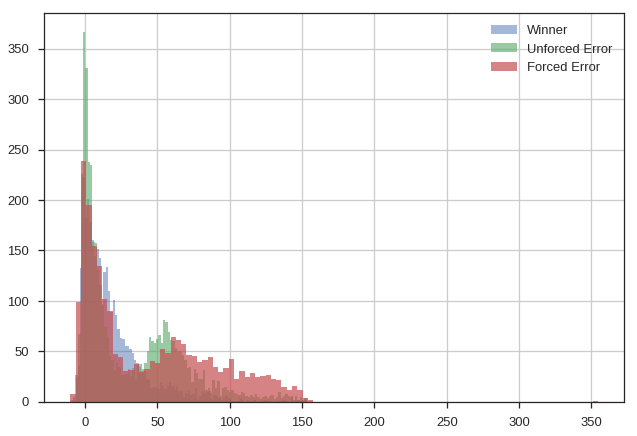

In [184]:
down_the_line_drop_characterisitcs = ((train['distance.from.sideline']) ** 2 +\
                                     (train['depth']) ** 2) -\
                                     train['player.distance.travelled']
            
down_the_line_drop_characterisitcs[(train['outcome']) == 'W'].hist(bins=100, alpha=.5, label='Winner')
down_the_line_drop_characterisitcs[(train['outcome']) == 'UE'].hist(bins=100, alpha=.6, label='Unforced Error')
down_the_line_drop_characterisitcs[(train['outcome']) == 'FE'].hist(bins=100, alpha=.7, label='Forced Error')

plt.legend();

In [171]:
"""
Lob is when a player who makes the final shot tries to return the ball over the head of an 
approaching player to the net.

Characteristics of the shot

a) Net clearance is very high.
b) Ball bounce is very close to the baseline.
c) Opponent is close to the net.
"""

def lob(train):
    mask = (train['net.clearance'] > train['net.clearance'].quantile(q=.8)) &\
           (train['depth'] < train['depth'].quantile(q=.25)) &\
           (train['opponent.depth'] < train['opponent.depth'].quantile(q=.25))
            
    print('Total number of such shots made: {}'.format(mask.sum()))
    print('Coverage: {}'.format(mask.sum() / len(mask)))
    print(train.loc[mask, 'outcome'].value_counts())

In [172]:
lob(train)

Total number of such shots made: 323
Coverage: 0.0323
FE    173
UE     98
W      52
Name: outcome, dtype: int64


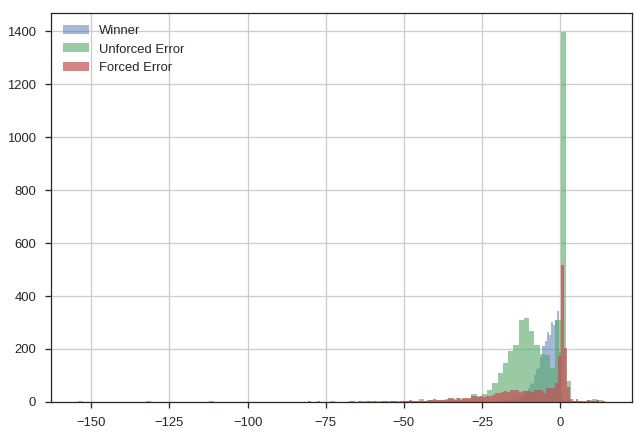

In [174]:
lob_characteristics = train['net.clearance'] * (train['depth'] - train['opponent.depth'])

lob_characteristics[(train['outcome']) == 'W'].hist(bins=100, alpha=.5, label='Winner')
lob_characteristics[(train['outcome']) == 'UE'].hist(bins=100, alpha=.6, label='Unforced Error')
lob_characteristics[(train['outcome']) == 'FE'].hist(bins=100, alpha=.7, label='Forced Error')

plt.legend();

In [191]:
"""
Approach shot is when opponent comes to the net after making his/her shot and you have to get it past him and 
you are at baseline.

Characteristics of the shot

a) Opponent very close to net.
b) You are at baseline.
"""

def approach_shot(train):
    mask = (train['opponent.depth'] < train['opponent.depth'].quantile(q=.25)) &\
           (train['player.impact.depth'] > train['player.impact.depth'].quantile(q=.75))
            
    print('Total number of such shots made: {}'.format(mask.sum()))
    print('Coverage: {}'.format(mask.sum() / len(mask)))
    print(train.loc[mask, 'outcome'].value_counts())

In [192]:
approach_shot(train)

Total number of such shots made: 727
Coverage: 0.0727
FE    452
UE    141
W     134
Name: outcome, dtype: int64


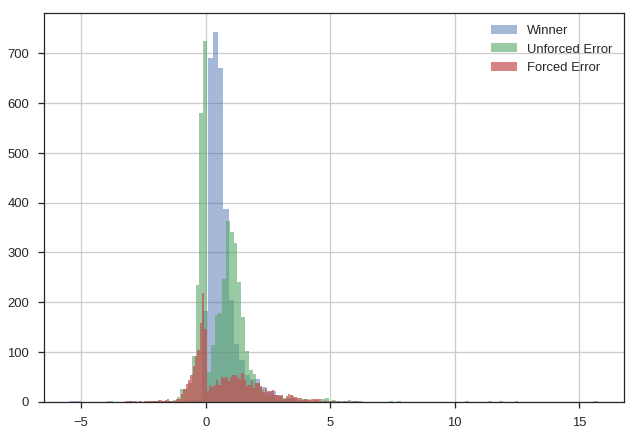

In [194]:
approach_shot_characteristics = train['net.clearance'] * (train['opponent.depth'] / train['player.impact.depth'])

approach_shot_characteristics[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='Winner')
approach_shot_characteristics[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='Unforced Error')
approach_shot_characteristics[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7, label='Forced Error')

plt.legend();

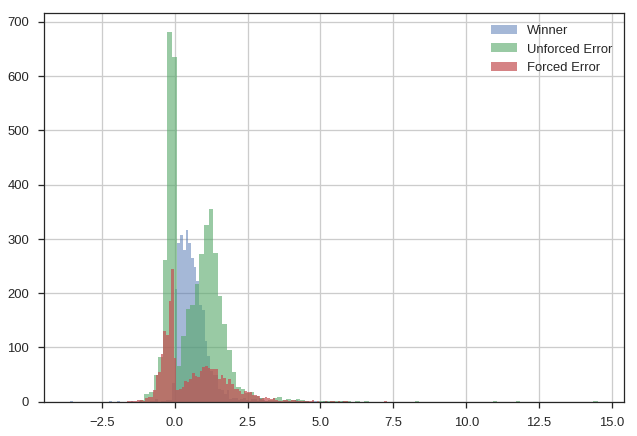

In [196]:
slice_shot_characterisitcs = train['net.clearance'] * (train['speed'] / train['previous.speed'])

slice_shot_characterisitcs[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='Winner')
slice_shot_characterisitcs[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='Unforced Error')
slice_shot_characterisitcs[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7, label='Forced Error')

plt.legend();

** Distribution of features in train and test. **

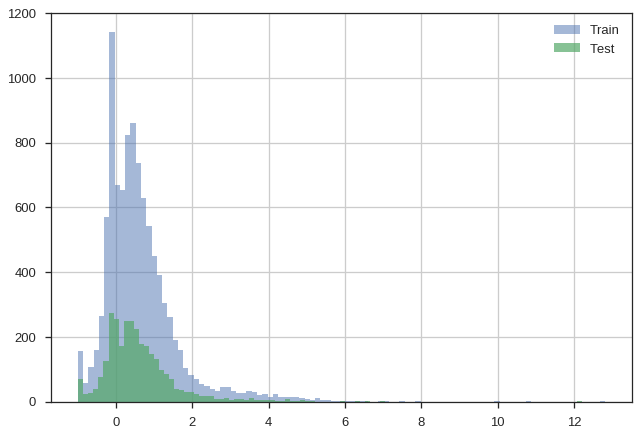

In [198]:
train.loc[:, 'net.clearance'].hist(bins=100, alpha=.5, label='Train')
test.loc[:, 'net.clearance'].hist(bins=100, alpha=.7, label='Test')

plt.legend(loc='best');

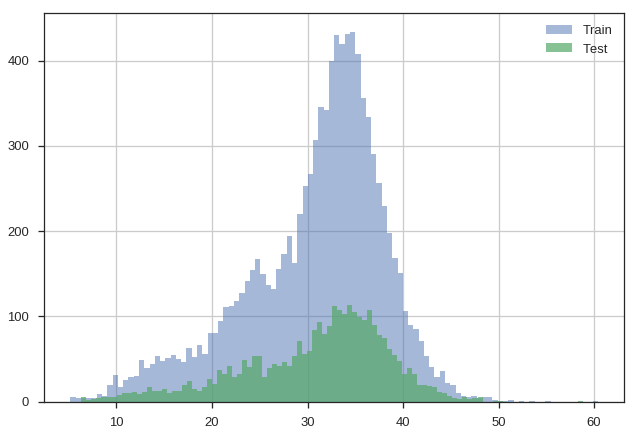

In [199]:
train.loc[:, 'speed'].hist(bins=100, alpha=.5, label='Train')
test.loc[:, 'speed'].hist(bins=100, alpha=.7, label='Test')

plt.legend(loc='best');

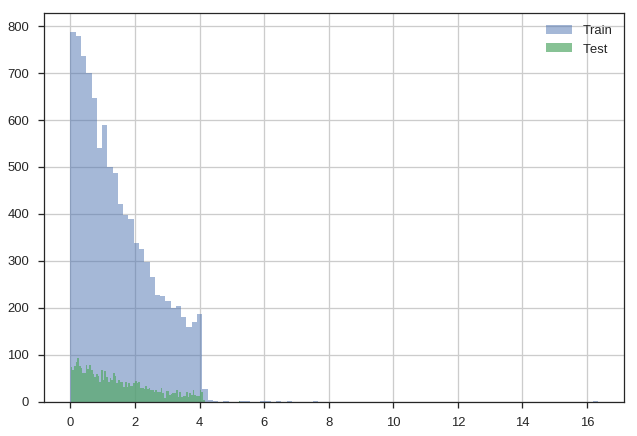

In [200]:
train.loc[:, 'distance.from.sideline'].hist(bins=100, alpha=.5, label='Train')
test.loc[:, 'distance.from.sideline'].hist(bins=100, alpha=.7, label='Test')

plt.legend(loc='best');

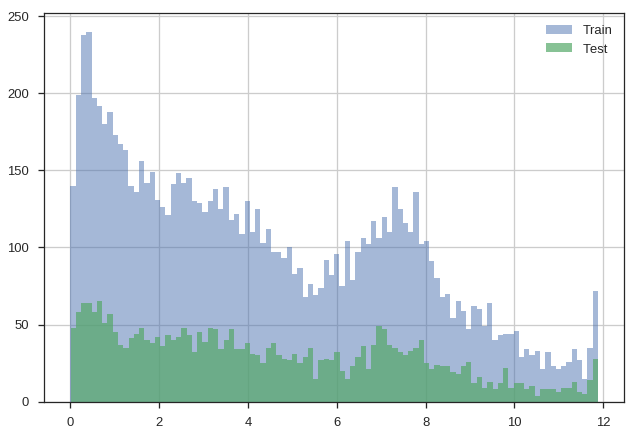

In [202]:
train.loc[:, 'depth'].hist(bins=100, alpha=.5, label='Train')
test.loc[:, 'depth'].hist(bins=100, alpha=.7, label='Test')

plt.legend(loc='best');

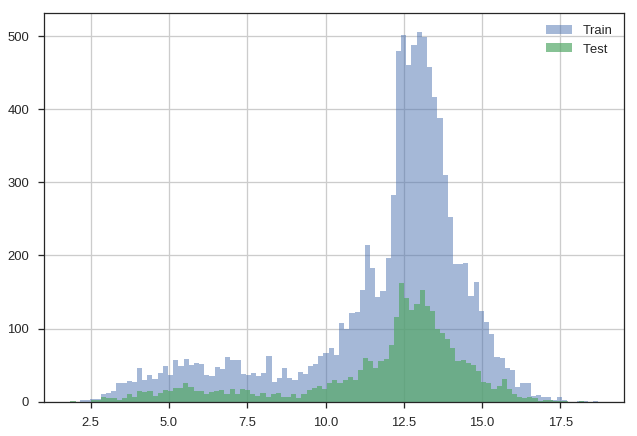

In [203]:
train.loc[:, 'player.impact.depth'].hist(bins=100, alpha=.5, label='Train')
test.loc[:, 'player.impact.depth'].hist(bins=100, alpha=.7, label='Test')

plt.legend(loc='best');

In [215]:
tought_shot_return = ((train['previous.distance.from.sideline'] / train['speed']) - train['previous.time.to.net'])

tought_shot_return[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='Winner')
tought_shot_return[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6, label='Unforced Error')
tought_shot_return[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7, label='Forced Error')

plt.legend();

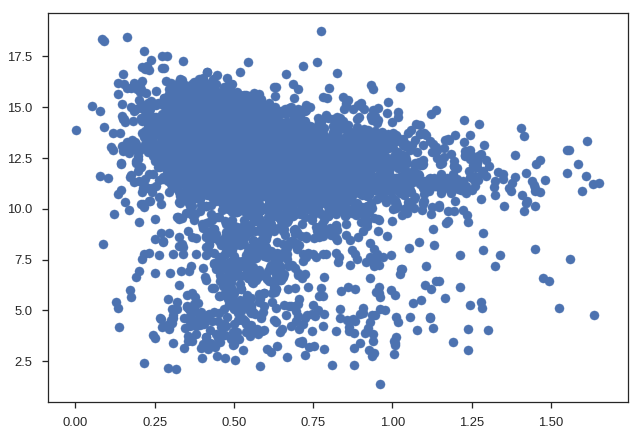

In [220]:
# relationship between previous.time.to.net and player.depth
plt.scatter(train['previous.time.to.net'], 
            train['player.depth']);

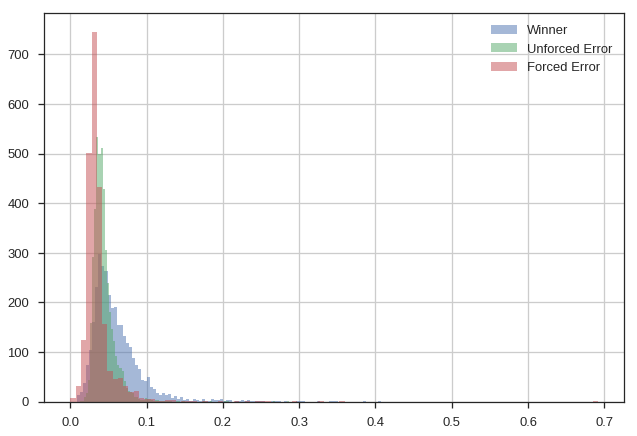

In [223]:
player_depth_time = (train['previous.time.to.net'] / train['player.depth'])

player_depth_time[(train['outcome'] == 'W')].hist(bins=100, alpha=.5, label='Winner')
player_depth_time[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5, label='Unforced Error')
player_depth_time[(train['outcome'] == 'FE')].hist(bins=100, alpha=.5, label='Forced Error')

plt.legend(loc='best');

In [ ]:
"""
Easy shot is when ball bounces close the center court and player is not on the run and has ample time to return 
the ball.

Characteristics of the shot

a) Ball bounce at the middle of the court.
b) Player returning the shot not on the move.
"""

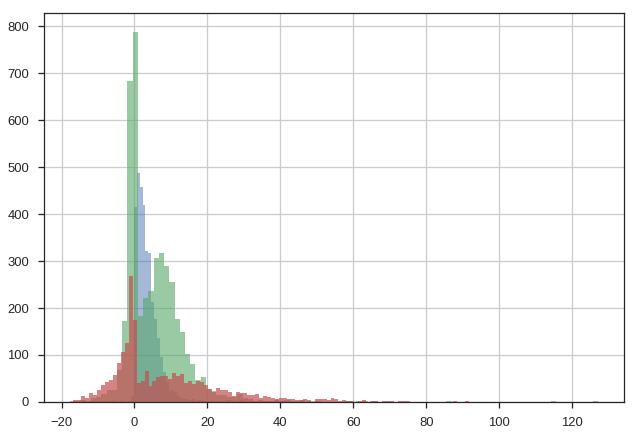

In [241]:
easy_shot_characterisitics = (abs(train['depth'] - 6) + train['player.distance.travelled'] + train['player.impact.distance.from.center']) * (train['net.clearance'])

easy_shot_characterisitics[(train['outcome'] == 'W') &\
                           np.isfinite(easy_shot_characterisitics) 
                          ].hist(bins=100, alpha=.5)
easy_shot_characterisitics[(train['outcome'] == 'UE') &\
                           np.isfinite(easy_shot_characterisitics) 
                          ].hist(bins=100, alpha=.6)
easy_shot_characterisitics[(train['outcome'] == 'FE') &\
                           np.isfinite(easy_shot_characterisitics)].hist(bins=100, alpha=.7)

plt.legend();

In [ ]:
"""
Volley is made in air before the ball bounces generally close to net or center line.

Characteristics of the shot

a) Net clearance is high.
b) Player is closer to the center or net.
c) Played with high speed
"""

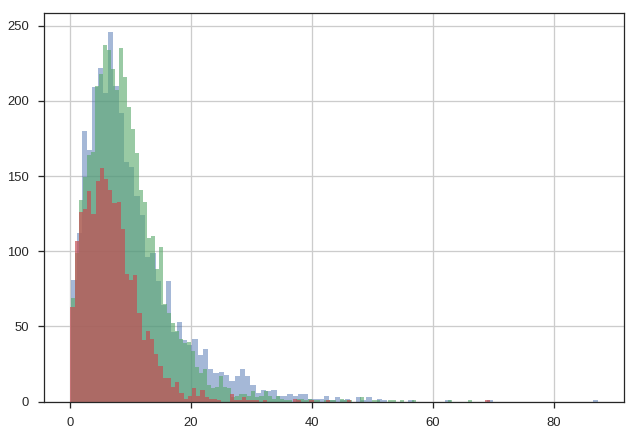

In [271]:
volley_characterisitcs = (train['previous.net.clearance'] * train['player.impact.depth']) 

volley_characterisitcs[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
volley_characterisitcs[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
volley_characterisitcs[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

In [278]:
pd.crosstab((train['previous.net.clearance'] > train['previous.net.clearance'].quantile(q=.9)).astype('str') + '_' +\
            (train['player.impact.depth'] > train['player.impact.depth'].quantile(q=.9)).astype('str') + '_' +\
            (train['net.clearance'] < 0).astype('str') + '_' +  (train['outside.sideline']).astype('str')
            ,
            train['outcome']
           )

outcome                   FE    UE     W
row_0                                   
False_False_False_False  527  1249  2521
False_False_False_True   415  1044     4
False_False_True_False   682  1450    45
False_False_True_True     41    48     3
False_True_False_False   169   134   106
False_True_False_True    138    62     1
False_True_True_False    228   102     5
False_True_True_True      26     0     0
True_False_False_False    16    97   653
True_False_False_True     12    67     1
True_False_True_False     11   102     8
True_False_True_True       0     4     0
True_True_False_False      0     7     5
True_True_False_True       2     5     0
True_True_True_False       5     5     0

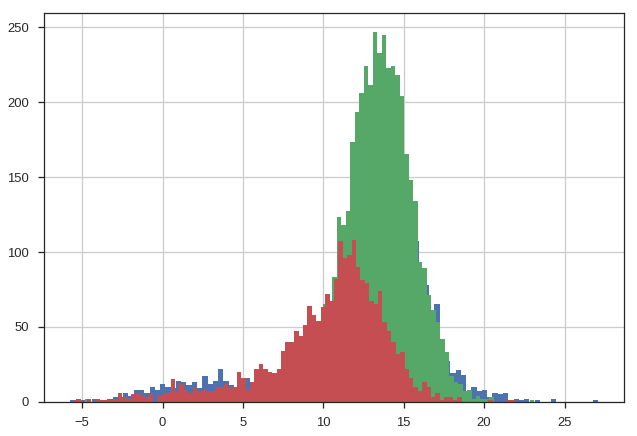

In [281]:
# comparing how much distance does ball have to cover compared to what player has to
# cover on the final shot

distance_travelled_by_ball   = (train['previous.time.to.net'] * train['previous.speed'])
distance_travelled_by_player = train['player.distance.travelled']

diff_distances = (distance_travelled_by_ball - distance_travelled_by_player)

diff_distances[(train['outcome'] == 'W')].hist(bins=100)
diff_distances[(train['outcome'] == 'UE')].hist(bins=100)
diff_distances[(train['outcome'] == 'FE')].hist(bins=100);

In [289]:
# cross court shots
ss = (train['distance.from.sideline'] -  train['previous.distance.from.sideline']) / train['previous.speed']

ss[(train['outcome'] == 'UE')].hist(bins=100)
ss[(train['outcome'] == 'FE')].hist(bins=100);

In [308]:
# passing shot
# when player is approaching net or is already at the net.

ss = (train['net.clearance'] * train['previous.distance.from.sideline'])

ss[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
ss[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
ss[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

### Opponent at the net

What happens when player A has to make the point-ending shot and player B is already at the net ?

In [317]:
# what if player B tries to lob player A

mask = (train['net.clearance'] > train['net.clearance'].quantile(q=.75)) &\
       (train['opponent.depth'] <= 6)

train.loc[mask, 'outcome'].value_counts()

FE    40
W     32
UE     3
Name: outcome, dtype: int64

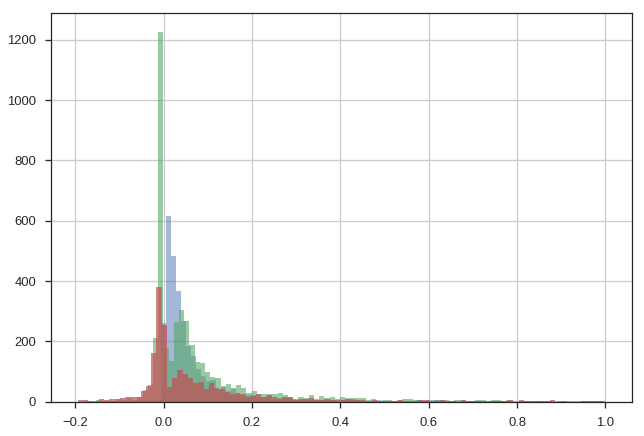

In [328]:
# what if player B receives the ball close to sideline and then tries to lob player A ?

lob_from_sideline = train['net.clearance'] / (train['distance.from.sideline'] * train['opponent.depth'])

mask = (lob_from_sideline > -.2) & (lob_from_sideline < 1)

lob_from_sideline[mask & (train['outcome'] == 'W')].hist(bins=100, alpha=.5)
lob_from_sideline[mask & (train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
lob_from_sideline[mask & (train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

## Comparison of mean and std of numeric features

In [346]:
train.loc[:, numeric_cols].mean()

rally                                  5.961000
serve                                  1.397100
speed                                 30.837528
net.clearance                          0.628731
distance.from.sideline                 1.470490
depth                                  4.425296
player.distance.travelled              2.711269
player.impact.depth                   11.896579
player.impact.distance.from.center     1.927651
player.depth                          12.267400
player.distance.from.center            1.215074
previous.speed                        28.768706
previous.net.clearance                 0.824491
previous.distance.from.sideline        2.189598
previous.depth                         4.227238
opponent.depth                        12.623845
opponent.distance.from.center          2.363476
previous.time.to.net                   0.551299
dtype: float64

In [348]:
train.loc[:, numeric_cols].std()

rally                                 3.519789
serve                                 0.489322
speed                                 7.281336
net.clearance                         0.976661
distance.from.sideline                1.121512
depth                                 3.127562
player.distance.travelled             1.723021
player.impact.depth                   2.800985
player.impact.distance.from.center    1.206538
player.depth                          2.039185
player.distance.from.center           0.963881
previous.speed                        6.502463
previous.net.clearance                0.681007
previous.distance.from.sideline       1.038526
previous.depth                        2.064763
opponent.depth                        2.070811
opponent.distance.from.center         1.312900
previous.time.to.net                  0.189259
dtype: float64

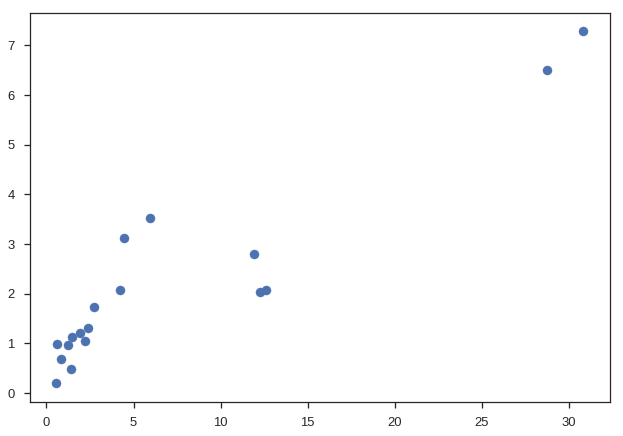

In [341]:
numeric_cols = train.select_dtypes(exclude=['object', 'bool']).columns.drop(['id', 'train'])

plt.scatter(train.loc[:, numeric_cols].mean().values,
            train.loc[:, numeric_cols].std().values
           );

** If an opponent is part of big rally and then suddenly faces drop shot, then if it is unable to return it then it should be considered as forced error. **

In [345]:
opponent_fatigue_level = train['rally'] * (train['speed'] - train['previous.speed'])

opponent_fatigue_level[(train['outcome'] == 'W')].hist(bins=100, alpha=.3)
opponent_fatigue_level[(train['outcome'] == 'UE')].hist(bins=100, alpha=.4)
opponent_fatigue_level[(train['outcome'] == 'FE')].hist(bins=100, alpha=.5);

** Change in ball positions **

In [359]:
change_in_lateral_distance_from_sideline = (train['distance.from.sideline'] - train['previous.distance.from.sideline'])
change_in_per_distance_from_baseline     = (train['depth'] - train['previous.depth'])

gradient_ball_position = change_in_lateral_distance_from_sideline / change_in_per_distance_from_baseline

mask = (gradient_ball_position > -5) & (gradient_ball_position < 5)

gradient_ball_position[mask & (train['outcome'] == 'W')].hist(bins=100, alpha=.3)
gradient_ball_position[mask & (train['outcome'] == 'UE')].hist(bins=100, alpha=.4)
gradient_ball_position[mask & (train['outcome'] == 'FE')].hist(bins=100, alpha=.5);

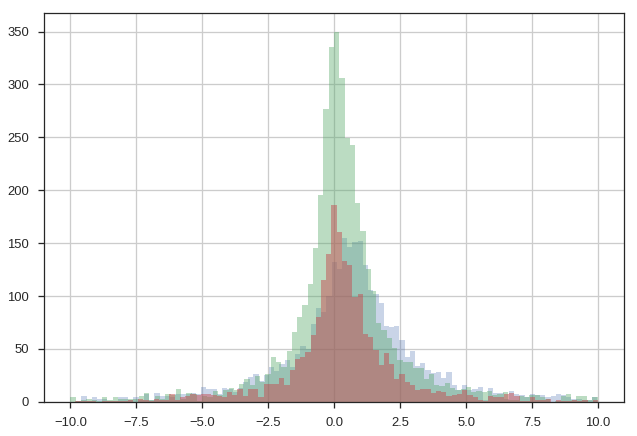

In [365]:
change_in_lateral_distance_from_sideline = (train['distance.from.sideline'] - train['previous.distance.from.sideline'])
change_in_per_distance_from_baseline     = (train['depth'] - train['previous.depth'])

gradient_ball_position = (change_in_lateral_distance_from_sideline / change_in_per_distance_from_baseline) * train['player.distance.travelled']

mask = (gradient_ball_position > -10) & (gradient_ball_position < 10)
gradient_ball_position[mask & (train['outcome'] == 'W')].hist(bins=100, alpha=.3)
gradient_ball_position[mask & (train['outcome'] == 'UE')].hist(bins=100, alpha=.4)
gradient_ball_position[mask & (train['outcome'] == 'FE')].hist(bins=100, alpha=.5);

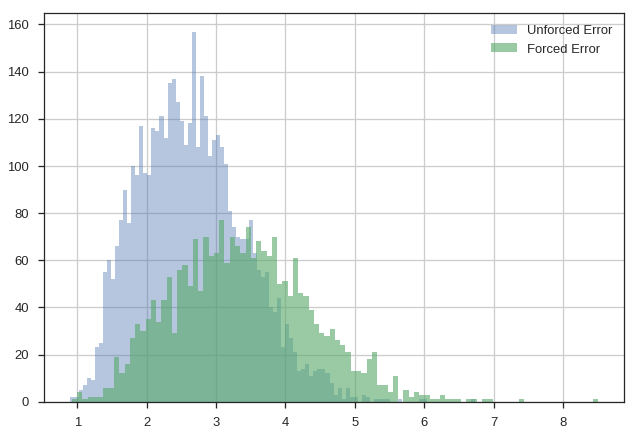

In [372]:
# ball court near center, ball speed not very high
easy_shot = (train['depth'] / 6) + (train['previous.speed'] / train['previous.speed'].median()) +\
            (train['player.distance.travelled'] / train['player.distance.travelled'].median())
    
easy_shot[(train['outcome'] == 'UE')].hist(bins=100, alpha=.4, label='Unforced Error')
easy_shot[(train['outcome'] == 'FE')].hist(bins=100, alpha=.6, label='Forced Error')

plt.legend(loc='best');

In [373]:
# ball distance and player distance dist comaprison
ball_player_dist_comparison = (train['previous.time.to.net'] * train['previous.speed']) - train['player.distance.travelled']
    
ball_player_dist_comparison[(train['outcome'] == 'UE')].hist(bins=100, alpha=.4, label='Unforced Error')
ball_player_dist_comparison[(train['outcome'] == 'FE')].hist(bins=100, alpha=.6, label='Forced Error')

plt.legend(loc='best');

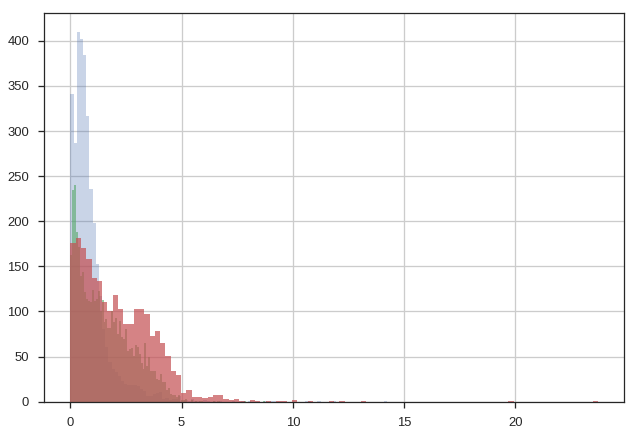

In [387]:
depth_comparison = ((train['player.impact.depth'] / train['opponent.depth'])) * (train['distance.from.sideline'])

depth_comparison[(train['outcome'] == 'W')].hist(bins=100, alpha=.3)
depth_comparison[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
depth_comparison[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

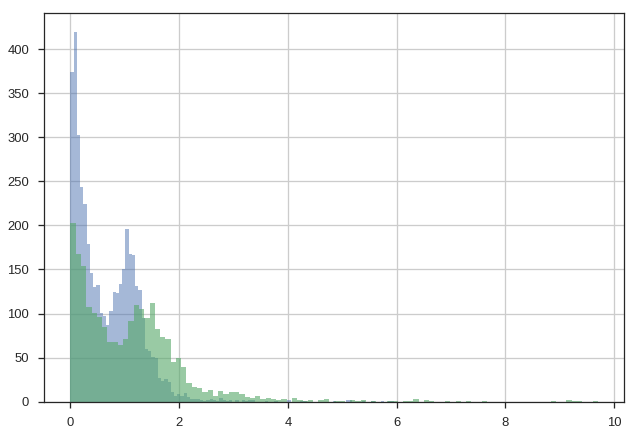

In [393]:
# player depth compared to ball depth with previous time to net 
ball_player_depth_time = (train['depth'] / (train['player.impact.depth'] * train['previous.time.to.net'])) 

ball_player_depth_time[(train['outcome'] == 'UE') & (ball_player_depth_time < 10)].hist(bins=100, alpha=.5)
ball_player_depth_time[(train['outcome'] == 'FE') & (ball_player_depth_time < 10)].hist(bins=100, alpha=.6);

In [416]:
player_b = np.sqrt(np.abs(train['player.distance.travelled'] ** 2 - train['depth'] ** 2))
player_a = np.sqrt(np.abs((train['previous.time.to.net'] * train['previous.speed']) ** 2 -\
                          ((12 - train['depth']) + train['opponent.depth']) ** 2))


player_b.hist(bins=100, alpha=.5, label='B')
player_a.hist(bins=100, alpha=.6, label='A')

plt.legend();

** Distribution of distances from sideline **

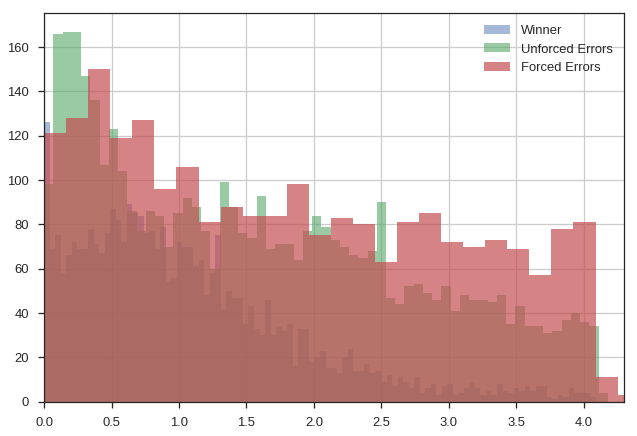

In [426]:
train.loc[(train['outcome'] == 'W'), 'distance.from.sideline'].hist(bins=100, alpha=.5, label='Winner')
train.loc[(train['outcome'] == 'UE'), 'distance.from.sideline'].hist(bins=100, alpha=.6, label='Unforced Errors')
train.loc[(train['outcome'] == 'FE'), 'distance.from.sideline'].hist(bins=100, alpha=.7, label='Forced Errors')

plt.xlim([0, 4.3])
plt.legend();

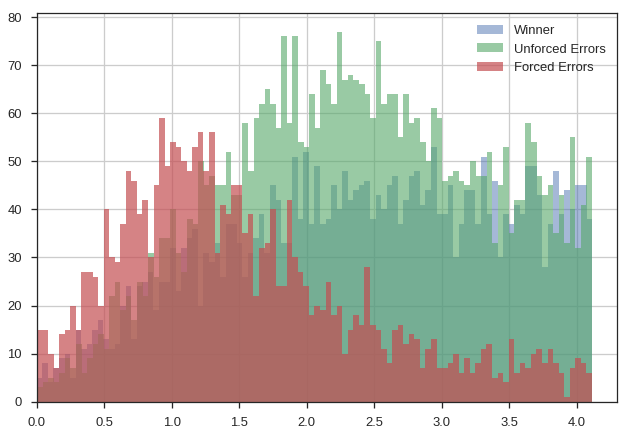

In [427]:
train.loc[(train['outcome'] == 'W'), 'previous.distance.from.sideline'].hist(bins=100, alpha=.5, label='Winner')
train.loc[(train['outcome'] == 'UE'), 'previous.distance.from.sideline'].hist(bins=100, alpha=.6, label='Unforced Errors')
train.loc[(train['outcome'] == 'FE'), 'previous.distance.from.sideline'].hist(bins=100, alpha=.7, label='Forced Errors')

plt.xlim([0, 4.3])
plt.legend();

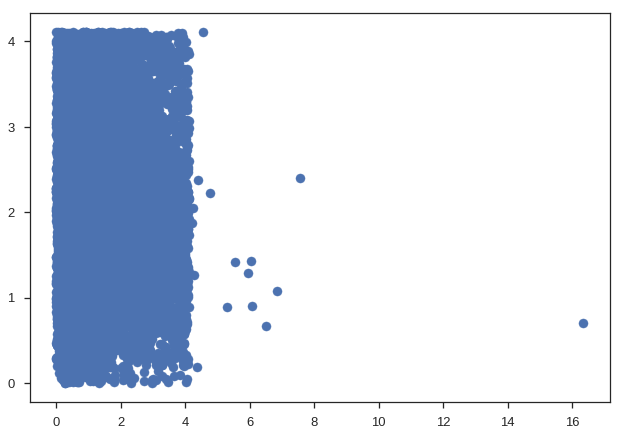

In [428]:
plt.scatter(train['distance.from.sideline'],
            train['previous.distance.from.sideline']
           );

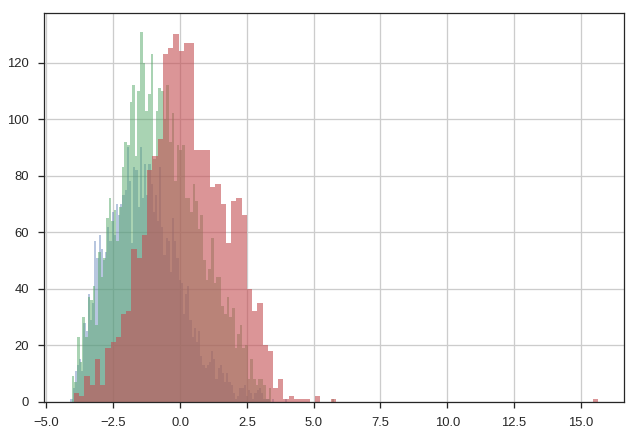

In [432]:
# difference in distance from ball bounce from sidelines between two shots
diff_distance_from_sidelines = train['distance.from.sideline'] - train['previous.distance.from.sideline']

diff_distance_from_sidelines[(train['outcome'] == 'W')].hist(bins=100, alpha=.4)
diff_distance_from_sidelines[(train['outcome'] == 'UE')].hist(bins=100, alpha=.5)
diff_distance_from_sidelines[(train['outcome'] == 'FE')].hist(bins=100, alpha=.6);

** previous.time.to.net and previous.distance.from.sideline **

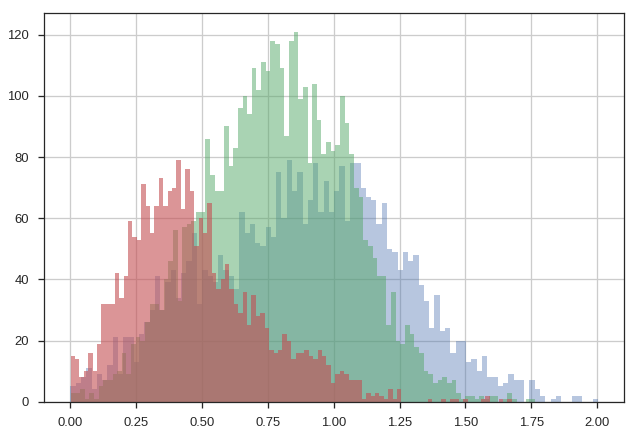

In [11]:
relationship = train['previous.distance.from.sideline'] * train['previous.time.to.net']

relationship[(train['outcome'] == 'W')].map(np.log1p).hist(bins=100, alpha=.4)
relationship[(train['outcome'] == 'UE')].map(np.log1p).hist(bins=100, alpha=.5)
relationship[(train['outcome'] == 'FE')].map(np.log1p).hist(bins=100, alpha=.6);

** Feature Scales **

In [19]:
train.select_dtypes(exclude=['object', 'bool']).agg({'min', 'max'}).T.astype(np.int)

max  min
rally                                 38    3
serve                                  2    1
speed                                 60    5
net.clearance                         12    0
distance.from.sideline                16    0
depth                                 11    0
player.distance.travelled             14    0
player.impact.depth                   18    2
player.impact.distance.from.center     7    0
player.depth                          18    1
player.distance.from.center            9    0
previous.speed                        55    7
previous.net.clearance                 6    0
previous.distance.from.sideline        4    0
previous.depth                         9    0
opponent.depth                        20    1
opponent.distance.from.center         12    0
previous.time.to.net                   1    0
id                                  9531    1
train                                  1    1

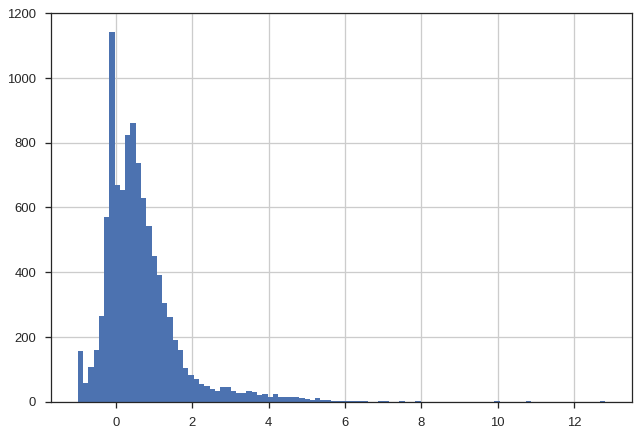

In [23]:
train['net.clearance'].hist(bins=100)

** Interaction between net clearance and previous.depth **

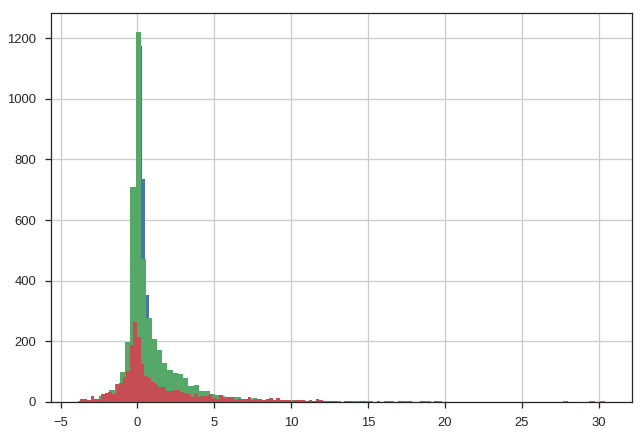

In [33]:
ss = (train['net.clearance'] * train['distance.from.sideline'])

ss[(train['outcome'] == 'W')].hist(bins=100)
ss[(train['outcome'] == 'UE')].hist(bins=100)
ss[(train['outcome'] == 'FE')].hist(bins=100);

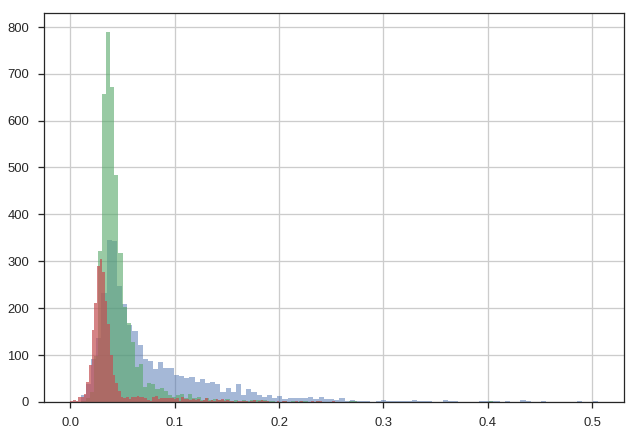

In [36]:
ss = (train['previous.time.to.net'] / train['player.impact.depth'])

ss[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
ss[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
ss[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);

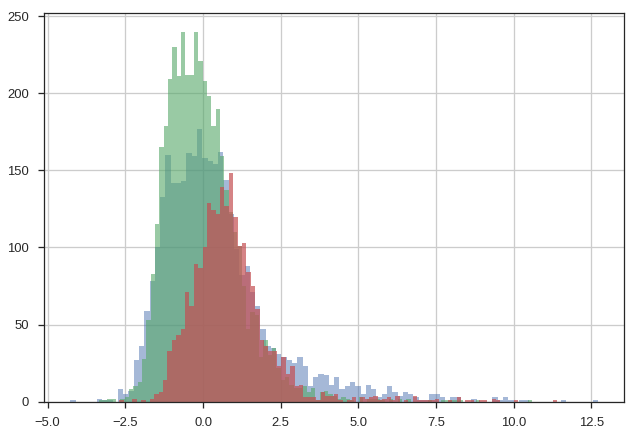

In [62]:
# player.distance.travelled, previous.distance.from.sideline, previous.time.to.net

ss = (train['player.distance.travelled'] - train['previous.distance.from.sideline']) * train['previous.time.to.net']

ss[(train['outcome'] == 'W')].hist(bins=100, alpha=.5)
ss[(train['outcome'] == 'UE')].hist(bins=100, alpha=.6)
ss[(train['outcome'] == 'FE')].hist(bins=100, alpha=.7);